1. 순환형 구조를 가진 모델(Models with recurrent structures):

- GConvGRU: 그래프 순환 유닛 (Graph Convolutional Gated Recurrent Unit)
- GConvLSTM: 그래프 순환 LSTM (Graph Convolutional Long Short-Term Memory)
- GCLSTM: 그래프 순환 LSTM (Graph Convolutional LSTM)
- DCRNN: 이중 그래프 순환 신경망 (Dual Graph Convolutional Recurrent Neural Network)

2. 그래프 합성곱 모델(Graph convolution models):

- LRGCN: 로컬-전역 그래프 합성곱 신경망 (Local-Global Graph Convolutional Network)
- TGCN: 전이 그래프 합성곱 신경망 (Transition Graph Convolutional Network)
- EvolveGCNO: 진화형 그래프 합성곱 네트워크 (Evolutionary Graph Convolutional Network with Optimization)
- EvolveGCNH: 진화형 그래프 합성곱 네트워크 (Evolutionary Graph Convolutional Network with Hypernetwork)

3. 동적 값 업데이트를 활용한 모델(Models utilizing dynamic value updates):

- DyGrEncoder: 동적 그래프 인코더 (Dynamic Graph Encoder)

논문에서 제안하는 방법은 GConvGRU (Chebyshev Graph Convolutional Gated Recurrent Unit Cell)와 GConvLSTM (Graph Convolutional Recurrent Network)이라는 두 가지 모델을 소개합니다. GConvGRU는 그래프 데이터에 대한 시간적인 의존성을 캡처하는데 사용되며, GConvLSTM은 그래프와 시퀀스 데이터를 동시에 처리하는데 활용됩니다.

GConvGRU는 Chebyshev 그래프 합성곱과 Gated Recurrent Unit (GRU)을 결합하여 그래프 데이터의 시간적 의존성을 모델링합니다. 이 모델은 그래프 내 노드들 간의 연결과 그래프의 구조를 고려하여 시계열 데이터를 예측하고 분석하는데 유용합니다.



"GC-LSTM: 그래프 합성곱 임베딩 LSTM을 이용한 동적 링크 예측"이라는 논문은 동적인 그래프에서 링크 예측 작업에 그래프 합성곱 네트워크(GCN)와 Long Short-Term Memory(LSTM) 셀을 결합한 새로운 모델을 제안합니다.

논문에서는 그래프 구조가 시간에 따라 변화하는 동적인 그래프에서 노드들 사이의 링크 존재 여부를 예측하는 문제를 다룹니다. 기존의 링크 예측 방법들은 동적인 그래프의 변화를 처리하는데 어려움이 있습니다.

제안하는 GC-LSTM 모델은 그래프 합성곱을 사용하여 노드의 특징을 임베딩하고 그래프 구조를 파악합니다. 동시에 LSTM 셀을 활용하여 시간적 의존성과 순차적 패턴을 모델링합니다.

GC-LSTM 모델은 동적인 그래프 데이터를 시간 순서대로 처리하여 변화하는 그래프 구조를 적절히 반영하고 미래의 링크를 정확하게 예측할 수 있습니다. 실험과 평가를 통해 GC-LSTM 모델이 동적인 링크 예측 작업에서 다른 최신 기법들보다 우수한 성능을 보여주며, 동적인 그래프 구조를 다루는데 유용한 접근 방법임을 입증합니다.

- GNAR stationary condition

In [1]:
import itstgcn
import torch
import pandas as pd

import numpy as np
import random

/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dict = itstgcn.load_data('./data/fivenodes.pkl')
loader = itstgcn.DatasetLoader(data_dict)

In [3]:
dataset = loader.get_dataset(lags=2)

In [4]:
sum_result = 0
for i in range(5):
    sum_result += np.sum(np.array(dataset.targets)[:,i])
print(sum_result)

-28.048902156588262


In [5]:
from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
loader1 = ChickenpoxDatasetLoader()

In [6]:
dataset1 = loader1.get_dataset(lags=4)

In [7]:
sum_result = 0
for i in range(20):
    sum_result += np.sum(np.array(dataset1.targets)[:,i])
print(sum_result)

9.553510148236436


In [8]:
from torch_geometric_temporal.dataset import PedalMeDatasetLoader
loader2 = PedalMeDatasetLoader()

In [9]:
dataset2 = loader2.get_dataset(lags=4)

In [10]:
sum_result = 0
for i in range(15):
    sum_result += np.sum(np.array(dataset2.targets)[:,i])
print(sum_result)

-39.06545396690812


In [11]:
from torch_geometric_temporal.dataset import WikiMathsDatasetLoader
loader3 = WikiMathsDatasetLoader()

In [12]:
dataset3 = loader3.get_dataset(lags=8)

In [13]:
sum_result = 0
for i in range(1068):
    sum_result += np.sum(np.array(dataset3.targets)[:,i])
print(sum_result)

-1543.6160620151331


In [14]:
loader6 = itstgcn.load_data('./data/Windmillsmall.pkl')

In [15]:
dataset6 = loader6.get_dataset(lags=8)

In [16]:
sum_result = 0
for i in range(11):
    sum_result += np.sum(np.array(dataset6.targets)[:,i])
print(sum_result)

0.33864788949161806


In [17]:
from torch_geometric_temporal.dataset import MontevideoBusDatasetLoader
loader10 = MontevideoBusDatasetLoader()

In [18]:
dataset10 = loader10.get_dataset(lags=8)

In [19]:
sum_result = 0
for i in range(675):
    sum_result += np.sum(np.array(dataset10.targets)[:,i])
print(sum_result)

1114.5722422676997


# Import

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

- GConvGRU

In [21]:
df_GConvGRU = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GConvGRU.csv')

pedal_wiki_GSO_GConvGRU = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GConvGRU_pedal_wiki_GSO.csv')

In [22]:
df_GConvGRU['model']='GConvGRU'
pedal_wiki_GSO_GConvGRU['model']='GConvGRU'

In [23]:
df_GConvGRU['dataset'].unique()

array(['fivenodes', 'chickenpox', 'pedalme', 'wikimath', 'windmillsmall',
       'monte'], dtype=object)

- GConvLSTM

In [24]:
df_GConvLSTM = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GConvLSTM.csv')

pedal_wiki_GSO_GConvLSTM = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GConvLSTM_pedal_wiki_GSO.csv')

In [25]:
df_GConvLSTM['model']='GConvLSTM'
pedal_wiki_GSO_GConvLSTM['model']='GConvLSTM'

In [26]:
df_GConvLSTM['dataset'].unique()

array(['fivenodes', 'chickenpox', 'pedalme', 'wikimath', 'windmillsmall',
       'monte'], dtype=object)

- GCLSTM

In [27]:
df_GCLSTM = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GCLSTM.csv')

pedal_wiki_GSO_GCLSTM = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GCLSTM_pedal_wiki_GSO.csv')

In [28]:
df_GCLSTM['model']='GCLSTM'
pedal_wiki_GSO_GCLSTM['model']='GCLSTM'

In [29]:
df_GCLSTM['dataset'].unique()

array(['fivenodes', 'chickenpox', 'pedalme', 'wikimath', 'windmillsmall',
       'monte'], dtype=object)

- DCRNN

In [30]:
df_DCRNN = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_DCRNN.csv')

pedal_wiki_GSO_DCRNN = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_DCRNN_pedal_wiki_GSO.csv')

In [31]:
df_DCRNN['model']='DCRNN'
pedal_wiki_GSO_DCRNN['model']='DCRNN'

- LRGCN

In [32]:
df_LRGCN = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_LRGCN.csv')

pedal_wiki_GSO_LRGCN = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_LRGCN_pedal_wiki_GSO.csv')

In [33]:
df_LRGCN['model']='LRGCN'
pedal_wiki_GSO_LRGCN['model']='LRGCN'

- TGCN

In [34]:
df_TGCN = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_TGCN.csv')

pedal_wiki_GSO_TGCN = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_TGCN_pedal_wiki_GSO.csv')

In [35]:
df_TGCN['model']='TGCN'
pedal_wiki_GSO_TGCN['model']='TGCN'

- EvolveGCNO

In [36]:
df_EvolveGCNO = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_EvolveGCNO.csv')

pedal_wiki_GSO_EvolveGCNO = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_EvolveGCNO_pedal_wiki_GSO.csv')

In [37]:
df_EvolveGCNO['model']='EvolveGCNO'
pedal_wiki_GSO_EvolveGCNO['model']='EvolveGCNO'

- DYGRENCODER

In [38]:
df_DYGRENCODER = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_DYGRENCODER.csv')

pedal_wiki_GSO_DYGRENCODER = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_DYGRENCODER_pedal_wiki_GSO.csv')

In [39]:
df_DYGRENCODER['model']='DyGrEncoder'
pedal_wiki_GSO_DYGRENCODER['model']='DyGrEncoder'

- EvolveGCNH

In [40]:
df_EvolveGCNH = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_EvolveGCNH.csv')

pedal_wiki_GSO_EvolveGCNH = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_EvolveGCNH_pedal_wiki_GSO.csv')

In [41]:
df_EvolveGCNH['model']='EvolveGCNH'
pedal_wiki_GSO_EvolveGCNH['model']='EvolveGCNH'

- GNAR

In [42]:
df_GNAR = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GNAR.csv')

wiki_GSO_GNAR = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GNAR_wiki_GSO.csv')

In [43]:
df_GNAR['model']='GNAR'
wiki_GSO_GNAR['model']='GNAR'

- all

In [44]:
df = pd.concat([df_GConvGRU, df_GConvLSTM, df_GCLSTM, df_DCRNN, df_LRGCN, df_TGCN, df_EvolveGCNO, df_DYGRENCODER, df_EvolveGCNH,df_GNAR]).reset_index().iloc[:,1:]

In [45]:
df

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
0,fivenodes,STGCN,0.0,NaN,2,12.0,NaN,50.0,0.729374,80.985221,GConvGRU
1,fivenodes,STGCN,0.0,NaN,2,12.0,NaN,50.0,0.729082,80.891788,GConvGRU
2,fivenodes,STGCN,0.7,rand,2,12.0,linear,50.0,1.892262,81.976547,GConvGRU
3,fivenodes,STGCN,0.7,rand,2,12.0,nearest,50.0,2.211288,87.803869,GConvGRU
4,fivenodes,STGCN,0.8,rand,2,12.0,linear,50.0,2.072818,103.648742,GConvGRU
...,...,...,...,...,...,...,...,...,...,...,...
26422,pedalme,GNAR,0.8,rand,4,NaN,nearest,NaN,1.302679,0.023105,GNAR
26423,pedalme,GNAR,0.5,rand,4,NaN,linear,NaN,1.302679,0.022839,GNAR
26424,pedalme,GNAR,0.5,rand,4,NaN,nearest,NaN,1.302679,0.023041,GNAR
26425,pedalme,GNAR,0.8,rand,4,NaN,linear,NaN,1.302679,0.060872,GNAR


In [46]:
df.to_csv('./df_fig.csv')

In [47]:
df2 = pd.concat([pedal_wiki_GSO_GConvGRU,pedal_wiki_GSO_GConvLSTM,pedal_wiki_GSO_GCLSTM,pedal_wiki_GSO_DCRNN,pedal_wiki_GSO_LRGCN,pedal_wiki_GSO_TGCN,pedal_wiki_GSO_EvolveGCNO,pedal_wiki_GSO_DYGRENCODER,pedal_wiki_GSO_EvolveGCNH,wiki_GSO_GNAR])

In [48]:
df2

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
0,pedalme,STGCN,0.300000,rand,4,12.0,linear,50.0,1.557424,6.553443,GConvGRU
1,pedalme,STGCN,0.300000,rand,4,12.0,nearest,50.0,1.591089,7.995071,GConvGRU
2,pedalme,STGCN,0.600000,rand,4,12.0,linear,50.0,1.737521,7.022613,GConvGRU
3,pedalme,STGCN,0.600000,rand,4,12.0,nearest,50.0,1.675156,6.745583,GConvGRU
4,pedalme,IT-STGCN,0.300000,rand,4,12.0,linear,50.0,1.123114,12.278102,GConvGRU
...,...,...,...,...,...,...,...,...,...,...,...
418,wikimath,STGCN,0.511945,block,8,12.0,linear,50.0,0.830234,255.170347,EvolveGCNH
419,wikimath,IT-STGCN,0.511945,block,8,12.0,linear,50.0,0.746624,630.021935,EvolveGCNH
0,wikimath,GNAR,0.511945,block,8,NaN,nearest,NaN,1.353637,143.252073,GNAR
1,wikimath,GNAR,0.511945,block,8,NaN,nearest,NaN,1.353637,211.333467,GNAR


# fivenode

## Baseline

In [49]:
df.query("model=='GNAR' and dataset=='fivenodes'")

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
26136,fivenodes,GNAR,0.0,NaN,2,NaN,NaN,NaN,1.40683,0.021981,GNAR
26137,fivenodes,GNAR,0.0,NaN,2,NaN,NaN,NaN,1.40683,0.017151,GNAR
26138,fivenodes,GNAR,0.7,rand,2,NaN,linear,NaN,1.40683,0.084960,GNAR
26139,fivenodes,GNAR,0.7,rand,2,NaN,nearest,NaN,1.40683,0.010853,GNAR
26140,fivenodes,GNAR,0.8,rand,2,NaN,linear,NaN,1.40683,0.012061,GNAR
...,...,...,...,...,...,...,...,...,...,...,...
26404,fivenodes,GNAR,0.3,rand,2,NaN,nearest,NaN,1.40683,0.008497,GNAR
26405,fivenodes,GNAR,0.5,rand,2,NaN,linear,NaN,1.40683,0.010377,GNAR
26406,fivenodes,GNAR,0.5,rand,2,NaN,nearest,NaN,1.40683,0.018586,GNAR
26407,fivenodes,GNAR,0.6,rand,2,NaN,linear,NaN,1.40683,0.007493,GNAR


In [50]:
pd.merge(df.query("dataset=='fivenodes' and mtype!='rand' and mtype!='block'").groupby(['model','nof_filters','lags','epoch'])['mse'].mean().reset_index(),
         df.query("dataset=='fivenodes' and mtype!='rand' and mtype!='block'").groupby(['model','nof_filters','lags','epoch'])['mse'].std().reset_index(),
         on=['model','nof_filters','lags','epoch']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,nof_filters,lags,epoch,mean,std
0,DCRNN,2.0,2,50.0,1.229,0.041
1,DyGrEncoder,12.0,2,50.0,1.114,0.037
2,EvolveGCNH,12.0,2,50.0,1.175,0.068
3,EvolveGCNO,12.0,2,50.0,1.168,0.065
4,GCLSTM,4.0,2,50.0,1.209,0.023
5,GConvGRU,12.0,2,50.0,0.732,0.005
6,GConvLSTM,12.0,2,50.0,1.131,0.041
7,LRGCN,4.0,2,50.0,1.212,0.024
8,TGCN,12.0,2,50.0,1.085,0.016


## Random

https://matplotlib.org/stable/gallery/statistics/boxplot.html#sphx-glr-gallery-statistics-boxplot-py

Text(0.5, 0.98, '')

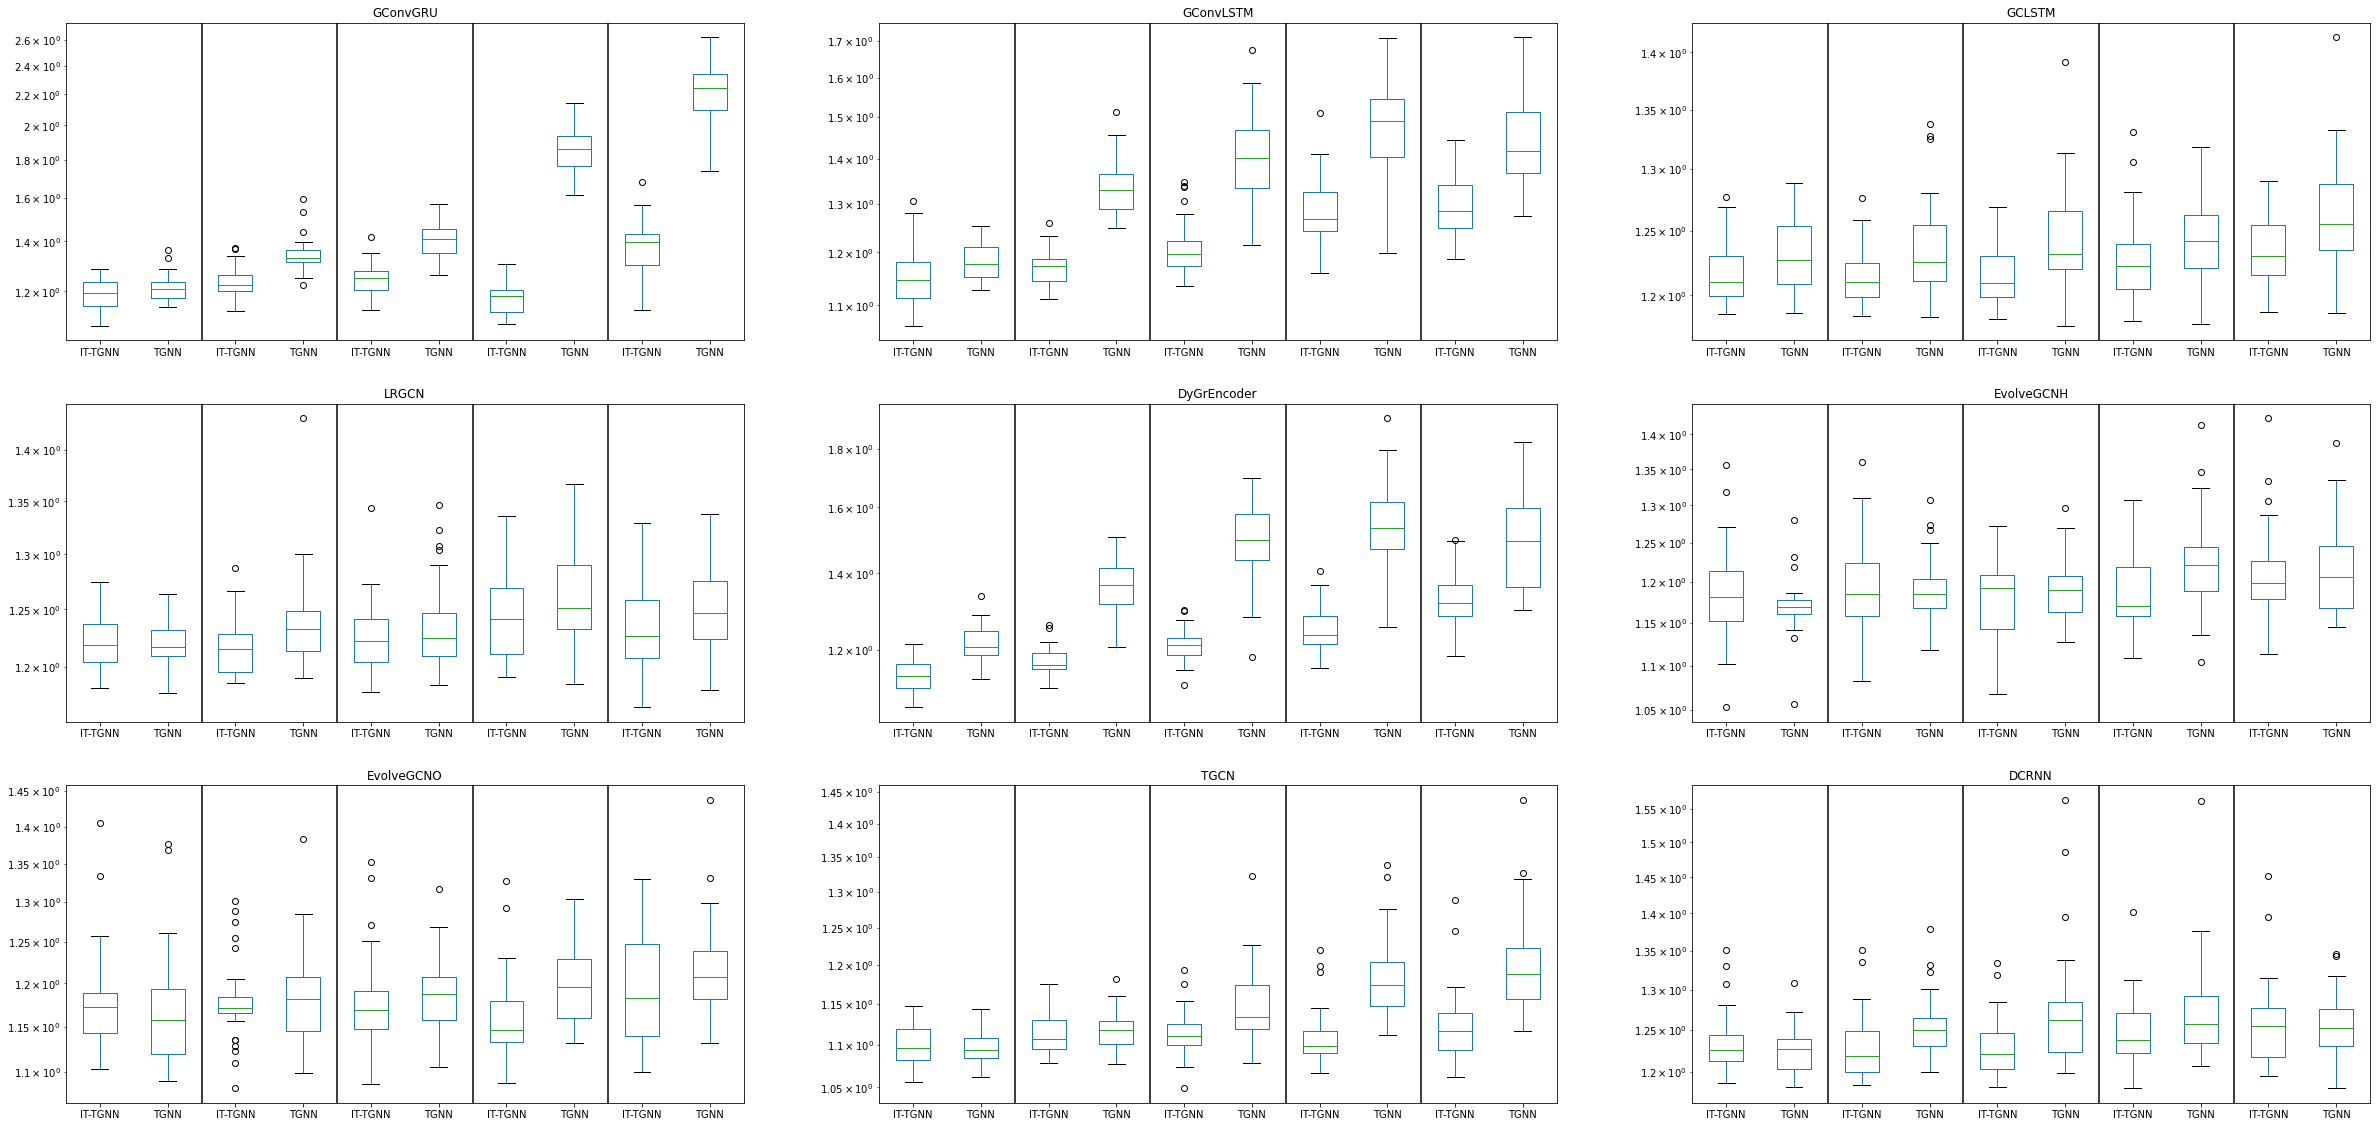

In [51]:
# with plt.style.context('cyberpunk'):
#     plt.rcParams['figure.figsize'] = [40,20]
fig, ax = plt.subplots(3, 3,figsize=(40,20))

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==2 and epoch==50 and model=='GConvGRU' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,0],grid=False,widths=0.5)
ax[0,0].set_title('GConvGRU')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==2 and epoch==50 and model=='GConvLSTM' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,1],grid=False,widths=0.5)
ax[0,1].set_title('GConvLSTM')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==4 and lags==2 and epoch==50 and model=='GCLSTM' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,2],grid=False,widths=0.5)
ax[0,2].set_title('GCLSTM')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==4 and lags==2 and epoch==50 and model=='LRGCN' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,0],grid=False,widths=0.5)
ax[1,0].set_title('LRGCN')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==2 and epoch==50 and model=='DyGrEncoder' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,1],grid=False,widths=0.5)
ax[1,1].set_title('DyGrEncoder')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and lags==2 and epoch==50 and model=='EvolveGCNH' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,2],grid=False,widths=0.5)
ax[1,2].set_title('EvolveGCNH')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and lags==2 and epoch==50 and model=='EvolveGCNO' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,0],grid=False,widths=0.5)
ax[2,0].set_title('EvolveGCNO')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==2 and epoch==50 and model=='TGCN' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,1],grid=False,widths=0.5)
ax[2,1].set_title('TGCN')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==2 and lags==2 and epoch==50 and model=='DCRNN' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,2],grid=False,widths=0.5)
ax[2,2].set_title('DCRNN')


for ax in ax.flat:
    ax.set_yticklabels([])
    ax.set_yscale('log')
    ax.axvline(x=2.5, color='black', linestyle='-')
    ax.axvline(x=4.5, color='black', linestyle='-')
    ax.axvline(x=6.5, color='black', linestyle='-')
    ax.axvline(x=8.5, color='black', linestyle='-')
    ax.set_xticklabels(['IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
fig.suptitle('',fontsize=40)

In [52]:
pd.merge(df.query("dataset=='fivenodes' and mtype=='rand'").groupby(['model','mrate','nof_filters','inter_method','method','lags','epoch'])['mse'].mean().reset_index(),
         df.query("dataset=='fivenodes' and mtype=='rand'").groupby(['model','mrate','nof_filters','inter_method','method','lags','epoch'])['mse'].std().reset_index(),
         on=['model','inter_method','method','nof_filters','mrate','lags','epoch']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate==0.7 and inter_method=='linear'")

,model,mrate,nof_filters,inter_method,method,lags,epoch,mean,std
12,DCRNN,0.7,2.0,linear,IT-STGCN,2,50.0,1.247,0.044
13,DCRNN,0.7,2.0,linear,STGCN,2,50.0,1.271,0.066
32,DyGrEncoder,0.7,12.0,linear,IT-STGCN,2,50.0,1.252,0.060
33,DyGrEncoder,0.7,12.0,linear,STGCN,2,50.0,1.548,0.158
52,EvolveGCNH,0.7,12.0,linear,IT-STGCN,2,50.0,1.188,0.049
53,EvolveGCNH,0.7,12.0,linear,STGCN,2,50.0,1.228,0.064
72,EvolveGCNO,0.7,12.0,linear,IT-STGCN,2,50.0,1.162,0.052
73,EvolveGCNO,0.7,12.0,linear,STGCN,2,50.0,1.198,0.045
92,GCLSTM,0.7,4.0,linear,IT-STGCN,2,50.0,1.228,0.034
93,GCLSTM,0.7,4.0,linear,STGCN,2,50.0,1.245,0.033


In [53]:
pd.merge(df.query("dataset=='fivenodes' and mtype=='rand'").groupby(['model','mrate','nof_filters','inter_method','method','lags','epoch'])['mse'].mean().reset_index(),
         df.query("dataset=='fivenodes' and mtype=='rand'").groupby(['model','mrate','nof_filters','inter_method','method','lags','epoch'])['mse'].std().reset_index(),
         on=['model','inter_method','method','nof_filters','mrate','lags','epoch']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate==0.8")

,model,mrate,nof_filters,inter_method,method,lags,epoch,mean,std
16,DCRNN,0.8,2.0,linear,IT-STGCN,2,50.0,1.257,0.057
17,DCRNN,0.8,2.0,linear,STGCN,2,50.0,1.255,0.040
18,DCRNN,0.8,2.0,nearest,IT-STGCN,2,50.0,1.246,0.034
19,DCRNN,0.8,2.0,nearest,STGCN,2,50.0,1.253,0.043
36,DyGrEncoder,0.8,12.0,linear,IT-STGCN,2,50.0,1.333,0.080
37,DyGrEncoder,0.8,12.0,linear,STGCN,2,50.0,1.496,0.146
38,DyGrEncoder,0.8,12.0,nearest,IT-STGCN,2,50.0,1.311,0.057
39,DyGrEncoder,0.8,12.0,nearest,STGCN,2,50.0,1.519,0.129
56,EvolveGCNH,0.8,12.0,linear,IT-STGCN,2,50.0,1.212,0.065
57,EvolveGCNH,0.8,12.0,linear,STGCN,2,50.0,1.217,0.061


## Block

In [54]:
pd.merge(df.query("dataset=='fivenodes' and mtype=='block'").groupby(['model','mrate','nof_filters','inter_method','method','epoch'])['mse'].mean().reset_index(),
         df.query("dataset=='fivenodes' and mtype=='block'").groupby(['model','mrate','nof_filters','inter_method','method','epoch'])['mse'].std().reset_index(),
         on=['model','inter_method','method','nof_filters','mrate','epoch']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,mrate,nof_filters,inter_method,method,epoch,mean,std
0,DCRNN,0.125,2.0,linear,IT-STGCN,50.0,1.232,0.033
1,DCRNN,0.125,2.0,linear,STGCN,50.0,1.260,0.051
2,DCRNN,0.125,2.0,nearest,IT-STGCN,50.0,1.222,0.025
3,DCRNN,0.125,2.0,nearest,STGCN,50.0,1.248,0.039
4,DyGrEncoder,0.125,12.0,linear,IT-STGCN,50.0,1.124,0.035
5,DyGrEncoder,0.125,12.0,linear,STGCN,50.0,1.173,0.037
6,DyGrEncoder,0.125,12.0,nearest,IT-STGCN,50.0,1.128,0.031
7,DyGrEncoder,0.125,12.0,nearest,STGCN,50.0,1.135,0.033
8,EvolveGCNH,0.125,12.0,linear,IT-STGCN,50.0,1.181,0.055
9,EvolveGCNH,0.125,12.0,linear,STGCN,50.0,1.197,0.076


In [55]:
pd.merge(df.query("dataset=='fivenodes' and mtype=='block'").groupby(['model','mrate','nof_filters','inter_method','method','epoch'])['mse'].mean().reset_index(),
         df.query("dataset=='fivenodes' and mtype=='block'").groupby(['model','mrate','nof_filters','inter_method','method','epoch'])['mse'].std().reset_index(),
         on=['model','inter_method','method','nof_filters','mrate','epoch']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("inter_method=='linear'")

,model,mrate,nof_filters,inter_method,method,epoch,mean,std
0,DCRNN,0.125,2.0,linear,IT-STGCN,50.0,1.232,0.033
1,DCRNN,0.125,2.0,linear,STGCN,50.0,1.260,0.051
4,DyGrEncoder,0.125,12.0,linear,IT-STGCN,50.0,1.124,0.035
5,DyGrEncoder,0.125,12.0,linear,STGCN,50.0,1.173,0.037
8,EvolveGCNH,0.125,12.0,linear,IT-STGCN,50.0,1.181,0.055
9,EvolveGCNH,0.125,12.0,linear,STGCN,50.0,1.197,0.076
12,EvolveGCNO,0.125,12.0,linear,IT-STGCN,50.0,1.162,0.040
13,EvolveGCNO,0.125,12.0,linear,STGCN,50.0,1.176,0.056
16,GCLSTM,0.125,4.0,linear,IT-STGCN,50.0,1.219,0.025
17,GCLSTM,0.125,4.0,linear,STGCN,50.0,1.244,0.033


# ChickenpoxDatasetLoader(lags=4)

In [56]:
df.query("model=='GNAR' and dataset=='chickenpox'")

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
26154,chickenpox,GNAR,0.00000,NaN,4,NaN,NaN,NaN,1.427494,0.087380,GNAR
26155,chickenpox,GNAR,0.30000,rand,4,NaN,linear,NaN,1.427494,0.086311,GNAR
26156,chickenpox,GNAR,0.80000,rand,4,NaN,linear,NaN,1.427494,0.101606,GNAR
26157,chickenpox,GNAR,0.00000,NaN,4,NaN,NaN,NaN,1.427494,0.100545,GNAR
26158,chickenpox,GNAR,0.30000,rand,4,NaN,linear,NaN,1.427494,0.084384,GNAR
26159,chickenpox,GNAR,0.80000,rand,4,NaN,linear,NaN,1.427494,0.095799,GNAR
26160,chickenpox,GNAR,0.00000,NaN,4,NaN,NaN,NaN,1.427494,0.135489,GNAR
26161,chickenpox,GNAR,0.30000,rand,4,NaN,linear,NaN,1.427494,0.097362,GNAR
26162,chickenpox,GNAR,0.80000,rand,4,NaN,linear,NaN,1.427494,0.108125,GNAR
26202,chickenpox,GNAR,0.28777,block,4,NaN,linear,NaN,1.427494,0.069579,GNAR


## Baseline

In [57]:
pd.merge(df.query("dataset=='chickenpox' and mtype!='rand' and mtype!='block'").groupby(['model','nof_filters'])['mse'].mean().reset_index(),
         df.query("dataset=='chickenpox' and mtype!='rand' and mtype!='block'").groupby(['model','nof_filters'])['mse'].std().reset_index(),
         on=['model','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,nof_filters,mean,std
0,DCRNN,16.0,0.727,0.009
1,DyGrEncoder,12.0,0.906,0.051
2,EvolveGCNH,32.0,1.000,0.020
3,EvolveGCNO,32.0,0.986,0.018
4,GCLSTM,16.0,0.885,0.051
5,GConvGRU,16.0,0.752,0.013
6,GConvLSTM,32.0,0.959,0.088
7,LRGCN,8.0,0.868,0.047
8,TGCN,12.0,1.090,0.042


## Random

Text(0.5, 0.98, '')

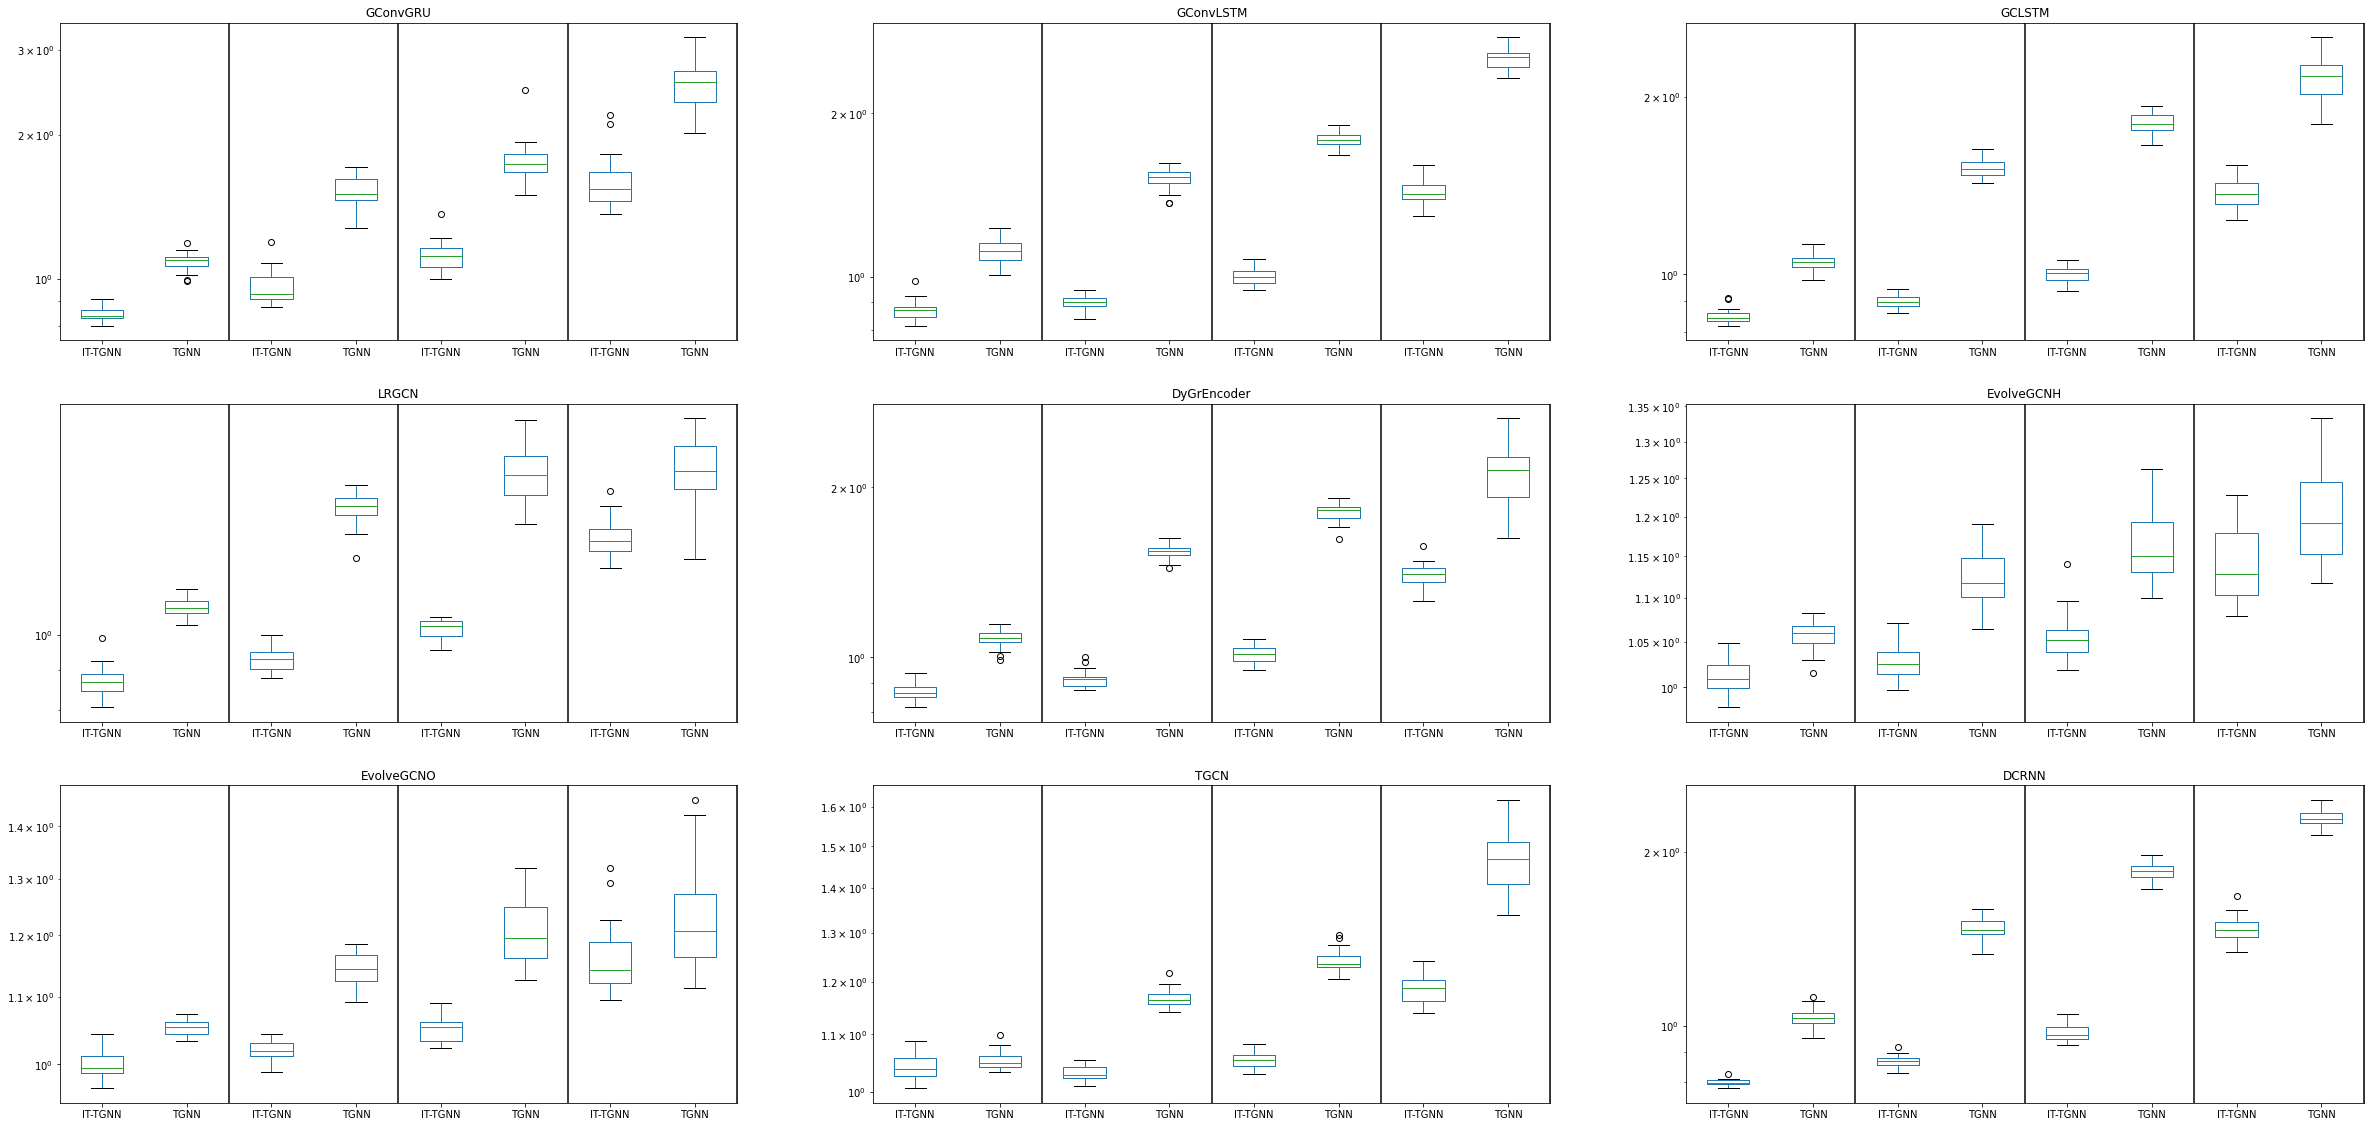

In [58]:
fig, ax = plt.subplots(3, 3,figsize=(40,20))

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==16 and lags==4 and epoch==50 and model=='GConvGRU' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,0],grid=False,widths=0.5)
ax[0,0].set_title('GConvGRU')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==32 and lags==4 and epoch==50 and model=='GConvLSTM' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,1],grid=False,widths=0.5)
ax[0,1].set_title('GConvLSTM')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==16 and lags==4 and epoch==50 and model=='GCLSTM' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,2],grid=False,widths=0.5)
ax[0,2].set_title('GCLSTM')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==8 and lags==4 and epoch==50 and model=='LRGCN' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,0],grid=False,widths=0.5)
ax[1,0].set_title('LRGCN')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==4 and epoch==50 and model=='DyGrEncoder' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,1],grid=False,widths=0.5)
ax[1,1].set_title('DyGrEncoder')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and lags==4 and epoch==50 and model=='EvolveGCNH' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,2],grid=False,widths=0.5)
ax[1,2].set_title('EvolveGCNH')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and lags==4 and epoch==50 and model=='EvolveGCNO' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,0],grid=False,widths=0.5)
ax[2,0].set_title('EvolveGCNO')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==4 and epoch==50 and model=='TGCN' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,1],grid=False,widths=0.5)
ax[2,1].set_title('TGCN')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==16 and lags==4 and epoch==50 and model=='DCRNN' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,2],grid=False,widths=0.5)
ax[2,2].set_title('DCRNN')


for ax in ax.flat:
    ax.set_yticklabels([])
    ax.set_yscale('log')
    ax.axvline(x=2.5, color='black', linestyle='-')
    ax.axvline(x=4.5, color='black', linestyle='-')
    ax.axvline(x=6.5, color='black', linestyle='-')
    ax.axvline(x=8.5, color='black', linestyle='-')
    ax.set_xticklabels(['IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
fig.suptitle('',fontsize=40)

In [59]:
pd.merge(df.query("dataset=='chickenpox' and mtype=='rand'").groupby(['model','mrate','inter_method','nof_filters','method'])['mse'].mean().reset_index(),
         df.query("dataset=='chickenpox' and mtype=='rand'").groupby(['model','mrate','inter_method','nof_filters','method'])['mse'].std().reset_index(),
         on=['model','method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate==0.3")

,model,mrate,inter_method,nof_filters,method,mean,std
0,DCRNN,0.3,linear,16.0,IT-STGCN,0.797,0.010
1,DCRNN,0.3,linear,16.0,STGCN,1.032,0.039
8,DyGrEncoder,0.3,linear,12.0,IT-STGCN,0.868,0.028
9,DyGrEncoder,0.3,linear,12.0,STGCN,1.080,0.037
16,EvolveGCNH,0.3,linear,32.0,IT-STGCN,1.011,0.019
17,EvolveGCNH,0.3,linear,32.0,STGCN,1.058,0.015
24,EvolveGCNO,0.3,linear,32.0,IT-STGCN,0.998,0.019
25,EvolveGCNO,0.3,linear,32.0,STGCN,1.054,0.011
32,GCLSTM,0.3,linear,16.0,IT-STGCN,0.850,0.022
33,GCLSTM,0.3,linear,16.0,STGCN,1.050,0.036


In [60]:
pd.merge(df.query("dataset=='chickenpox' and mtype=='rand'").groupby(['model','mrate','inter_method','nof_filters','method'])['mse'].mean().reset_index(),
         df.query("dataset=='chickenpox' and mtype=='rand'").groupby(['model','mrate','inter_method','nof_filters','method'])['mse'].std().reset_index(),
         on=['model','method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate!=0.3")

,model,mrate,inter_method,nof_filters,method,mean,std
2,DCRNN,0.5,linear,16.0,IT-STGCN,0.869,0.018
3,DCRNN,0.5,linear,16.0,STGCN,1.473,0.058
4,DCRNN,0.6,linear,16.0,IT-STGCN,0.973,0.032
5,DCRNN,0.6,linear,16.0,STGCN,1.848,0.072
6,DCRNN,0.8,linear,16.0,IT-STGCN,1.467,0.076
7,DCRNN,0.8,linear,16.0,STGCN,2.287,0.074
10,DyGrEncoder,0.5,linear,12.0,IT-STGCN,0.915,0.029
11,DyGrEncoder,0.5,linear,12.0,STGCN,1.540,0.045
12,DyGrEncoder,0.6,linear,12.0,IT-STGCN,1.013,0.035
13,DyGrEncoder,0.6,linear,12.0,STGCN,1.807,0.068


## Block

In [61]:
pd.merge(df.query("dataset=='chickenpox' and mtype=='block'").groupby(['model','inter_method','mrate','nof_filters','method'])['mse'].mean().reset_index(),
         df.query("dataset=='chickenpox' and mtype=='block'").groupby(['model','inter_method','mrate','nof_filters','method'])['mse'].std().reset_index(),
         on=['model','method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,inter_method,mrate,nof_filters,method,mean,std
0,DCRNN,linear,0.288,16.0,IT-STGCN,0.740,0.007
1,DCRNN,linear,0.288,16.0,STGCN,0.812,0.006
2,DCRNN,nearest,0.288,16.0,IT-STGCN,0.738,0.007
3,DCRNN,nearest,0.288,16.0,STGCN,0.832,0.009
4,DyGrEncoder,linear,0.288,12.0,IT-STGCN,0.899,0.035
5,DyGrEncoder,linear,0.288,12.0,STGCN,0.912,0.043
6,DyGrEncoder,nearest,0.288,12.0,IT-STGCN,0.909,0.043
7,DyGrEncoder,nearest,0.288,12.0,STGCN,0.930,0.035
8,EvolveGCNH,linear,0.288,32.0,IT-STGCN,1.007,0.021
9,EvolveGCNH,linear,0.288,32.0,STGCN,1.027,0.023


In [62]:
pd.merge(df.query("dataset=='chickenpox' and mtype=='block'").groupby(['model','inter_method','mrate','nof_filters','method'])['mse'].mean().reset_index(),
         df.query("dataset=='chickenpox' and mtype=='block'").groupby(['model','inter_method','mrate','nof_filters','method'])['mse'].std().reset_index(),
         on=['model','method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("inter_method=='linear'")

,model,inter_method,mrate,nof_filters,method,mean,std
0,DCRNN,linear,0.288,16.0,IT-STGCN,0.740,0.007
1,DCRNN,linear,0.288,16.0,STGCN,0.812,0.006
4,DyGrEncoder,linear,0.288,12.0,IT-STGCN,0.899,0.035
5,DyGrEncoder,linear,0.288,12.0,STGCN,0.912,0.043
8,EvolveGCNH,linear,0.288,32.0,IT-STGCN,1.007,0.021
9,EvolveGCNH,linear,0.288,32.0,STGCN,1.027,0.023
12,EvolveGCNO,linear,0.288,32.0,IT-STGCN,1.002,0.015
13,EvolveGCNO,linear,0.288,32.0,STGCN,1.028,0.016
16,GCLSTM,linear,0.288,16.0,IT-STGCN,0.883,0.045
17,GCLSTM,linear,0.288,16.0,STGCN,0.890,0.033


# PedalMeDatasetLoader (lags=4)

In [63]:
df.query("model=='GNAR' and dataset=='pedalme'")

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
26163,pedalme,GNAR,0.000000,NaN,4,NaN,NaN,NaN,1.302679,0.031931,GNAR
26164,pedalme,GNAR,0.000000,NaN,4,NaN,NaN,NaN,1.302679,0.027079,GNAR
26165,pedalme,GNAR,0.300000,rand,4,NaN,linear,NaN,1.302679,0.036771,GNAR
26166,pedalme,GNAR,0.300000,rand,4,NaN,nearest,NaN,1.302679,0.022349,GNAR
26167,pedalme,GNAR,0.600000,rand,4,NaN,linear,NaN,1.302679,0.022278,GNAR
26168,pedalme,GNAR,0.600000,rand,4,NaN,nearest,NaN,1.302679,0.029977,GNAR
26169,pedalme,GNAR,0.000000,NaN,4,NaN,NaN,NaN,1.302679,0.022007,GNAR
26170,pedalme,GNAR,0.000000,NaN,4,NaN,NaN,NaN,1.302679,0.026209,GNAR
26171,pedalme,GNAR,0.300000,rand,4,NaN,linear,NaN,1.302679,0.024794,GNAR
26172,pedalme,GNAR,0.300000,rand,4,NaN,nearest,NaN,1.302679,0.020568,GNAR


## Baseline

In [64]:
pd.merge(df.query("dataset=='pedalme' and mtype!='rand' and mtype!='block'").groupby(['model','lags','nof_filters'])['mse'].mean().reset_index(),
         df.query("dataset=='pedalme' and mtype!='rand' and mtype!='block'").groupby(['model','lags','nof_filters'])['mse'].std().reset_index(),
         on=['model','lags','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,model,lags,nof_filters,mean,std
0,DCRNN,4,8.0,1.131,0.015
1,DyGrEncoder,4,12.0,1.190,0.047
2,EvolveGCNH,4,2.0,1.213,0.057
3,EvolveGCNO,4,2.0,1.223,0.051
4,GCLSTM,4,4.0,1.181,0.040
5,GConvGRU,4,12.0,1.233,0.107
6,GConvLSTM,4,2.0,1.214,0.055
7,LRGCN,4,8.0,1.191,0.054
8,TGCN,4,12.0,1.307,0.075


## Random

Text(0.5, 0.98, '')

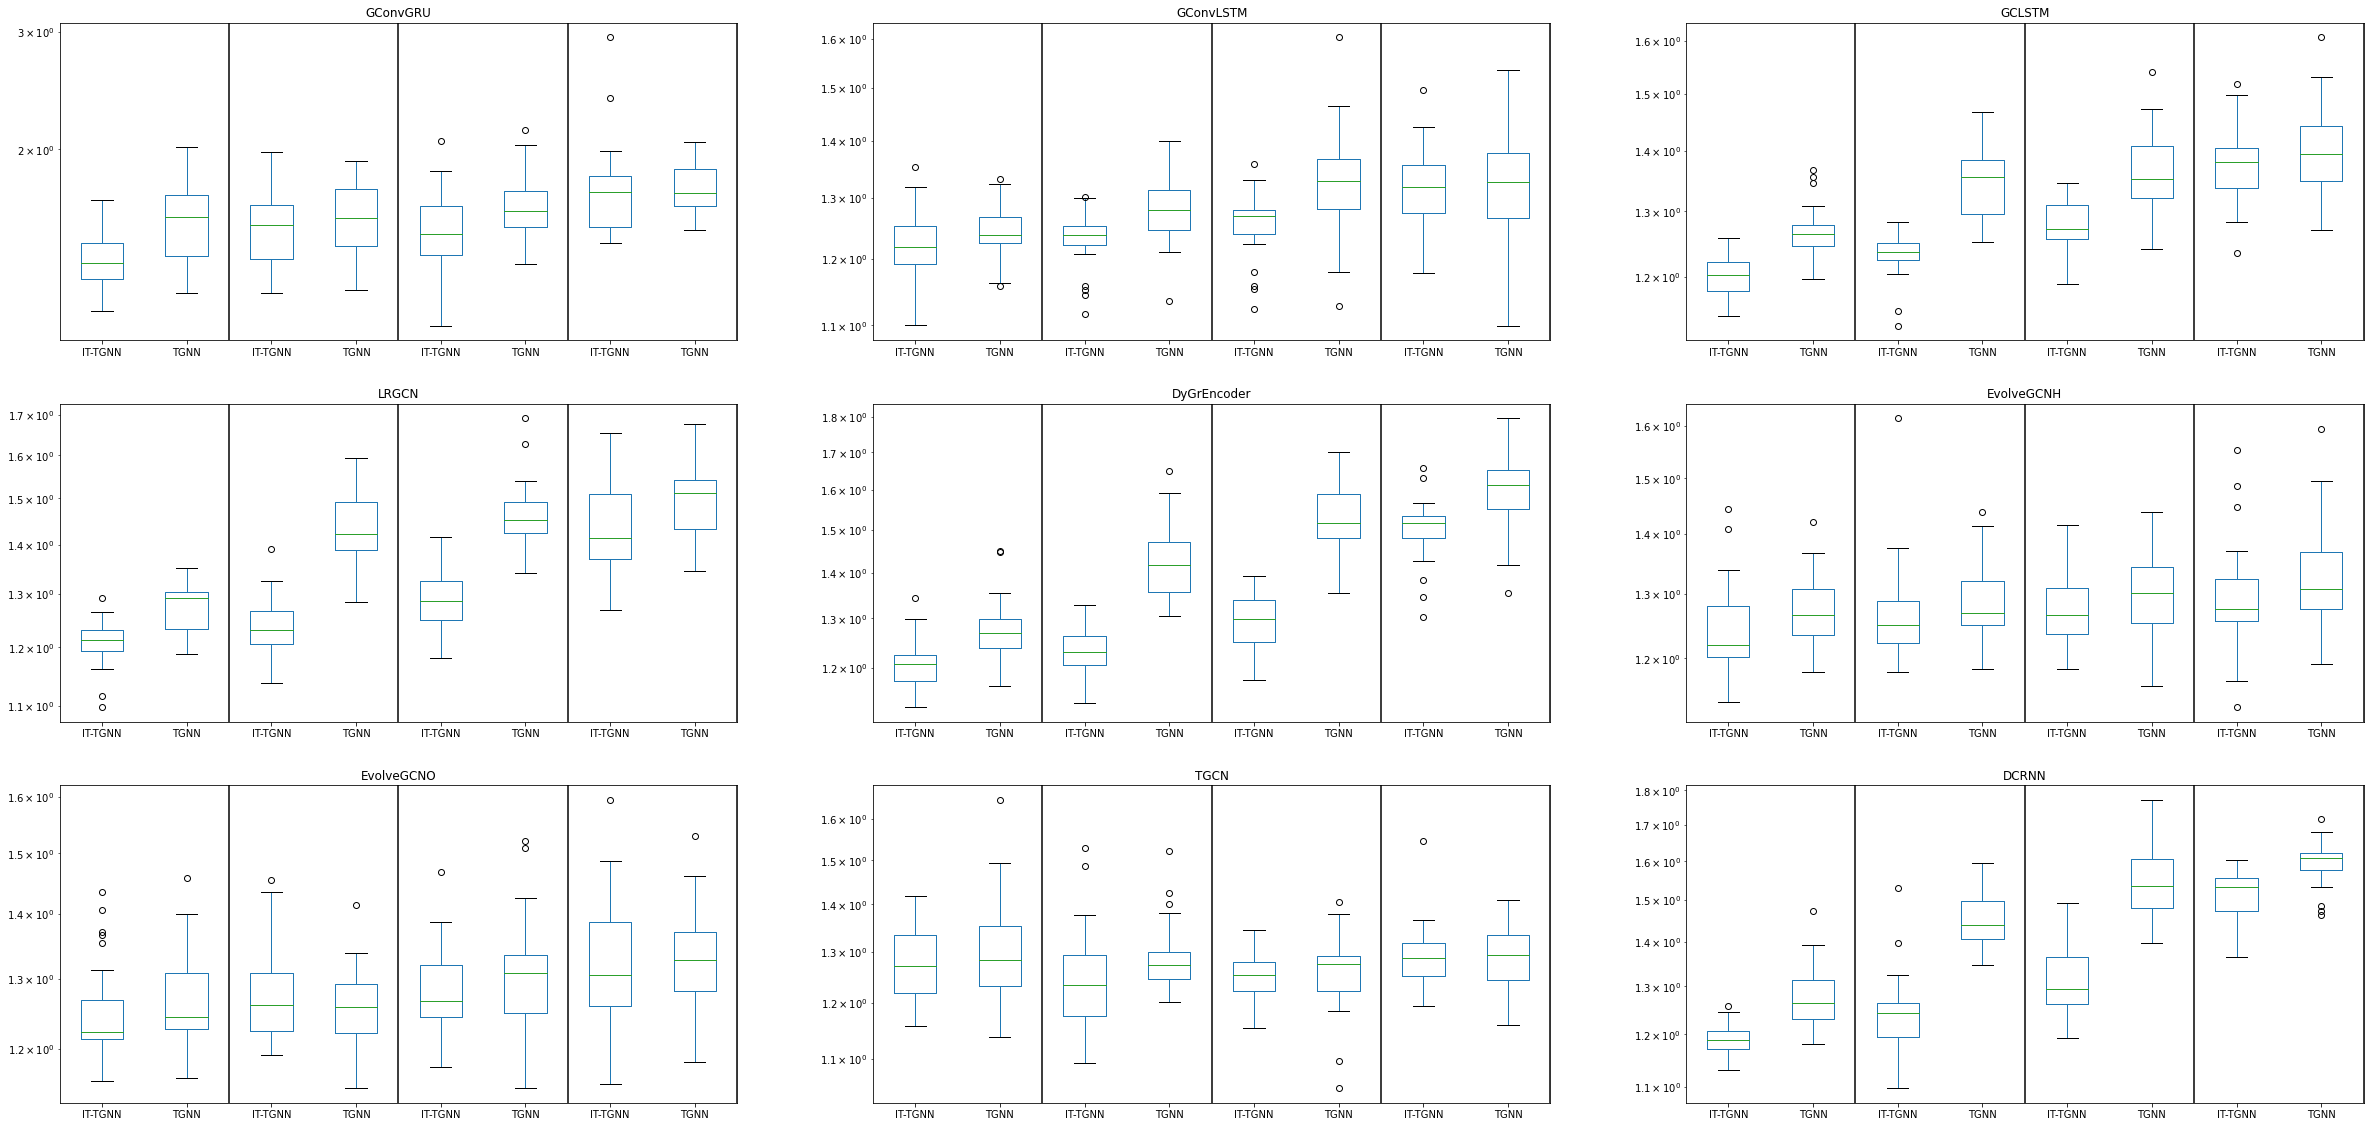

In [65]:
fig, ax = plt.subplots(3, 3,figsize=(40,20))

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==4 and epoch==50 and model=='GConvGRU' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,0],grid=False,widths=0.5)
ax[0,0].set_title('GConvGRU')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==2 and lags==4 and epoch==50 and model=='GConvLSTM' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,1],grid=False,widths=0.5)
ax[0,1].set_title('GConvLSTM')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==4 and lags==4 and epoch==50 and model=='GCLSTM' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,2],grid=False,widths=0.5)
ax[0,2].set_title('GCLSTM')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==8 and lags==4 and epoch==50 and model=='LRGCN' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,0],grid=False,widths=0.5)
ax[1,0].set_title('LRGCN')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==4 and epoch==50 and model=='DyGrEncoder' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,1],grid=False,widths=0.5)
ax[1,1].set_title('DyGrEncoder')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and lags==4 and epoch==50 and model=='EvolveGCNH' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,2],grid=False,widths=0.5)
ax[1,2].set_title('EvolveGCNH')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and lags==4 and epoch==50 and model=='EvolveGCNO' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,0],grid=False,widths=0.5)
ax[2,0].set_title('EvolveGCNO')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==4 and epoch==50 and model=='TGCN' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,1],grid=False,widths=0.5)
ax[2,1].set_title('TGCN')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==8 and lags==4 and epoch==50 and model=='DCRNN' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,2],grid=False,widths=0.5)
ax[2,2].set_title('DCRNN')


for ax in ax.flat:
    ax.set_yticklabels([])
    ax.set_yscale('log')
    ax.axvline(x=2.5, color='black', linestyle='-')
    ax.axvline(x=4.5, color='black', linestyle='-')
    ax.axvline(x=6.5, color='black', linestyle='-')
    ax.axvline(x=8.5, color='black', linestyle='-')
    ax.set_xticklabels(['IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
fig.suptitle('',fontsize=40)

In [66]:
pd.merge(df.query("dataset=='pedalme' and mtype=='rand'").groupby(['model','mrate','lags','nof_filters','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='pedalme' and mtype=='rand'").groupby(['model','mrate','lags','nof_filters','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','nof_filters','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate == 0.3")

,model,mrate,lags,nof_filters,inter_method,method,mean,std
0,DCRNN,0.3,4,8.0,linear,IT-STGCN,1.190,0.029
1,DCRNN,0.3,4,8.0,linear,STGCN,1.277,0.064
2,DCRNN,0.3,4,8.0,nearest,IT-STGCN,1.179,0.035
3,DCRNN,0.3,4,8.0,nearest,STGCN,1.278,0.060
16,DyGrEncoder,0.3,4,12.0,linear,IT-STGCN,1.207,0.046
17,DyGrEncoder,0.3,4,12.0,linear,STGCN,1.279,0.061
18,DyGrEncoder,0.3,4,12.0,nearest,IT-STGCN,1.205,0.075
19,DyGrEncoder,0.3,4,12.0,nearest,STGCN,1.289,0.096
32,EvolveGCNH,0.3,4,2.0,linear,IT-STGCN,1.245,0.069
33,EvolveGCNH,0.3,4,2.0,linear,STGCN,1.273,0.057


In [67]:
pd.merge(df.query("dataset=='pedalme' and mtype=='rand'").groupby(['model','mrate','lags','nof_filters','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='pedalme' and mtype=='rand'").groupby(['model','mrate','lags','nof_filters','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','nof_filters','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate != 0.3")

,model,mrate,lags,nof_filters,inter_method,method,mean,std
4,DCRNN,0.5,4,8.0,linear,IT-STGCN,1.238,0.080
5,DCRNN,0.5,4,8.0,linear,STGCN,1.451,0.061
6,DCRNN,0.5,4,8.0,nearest,IT-STGCN,1.232,0.061
7,DCRNN,0.5,4,8.0,nearest,STGCN,1.447,0.073
8,DCRNN,0.6,4,8.0,linear,IT-STGCN,1.314,0.072
...,...,...,...,...,...,...,...,...
139,TGCN,0.6,4,12.0,nearest,STGCN,1.301,0.090
140,TGCN,0.8,4,12.0,linear,IT-STGCN,1.294,0.063
141,TGCN,0.8,4,12.0,linear,STGCN,1.289,0.065
142,TGCN,0.8,4,12.0,nearest,IT-STGCN,1.258,0.053


In [68]:
pd.merge(df.query("dataset=='pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate != 0.3").\
query("inter_method=='nearest'")

,model,mrate,lags,inter_method,method,mean,std
6,DCRNN,0.5,4,nearest,IT-STGCN,1.232,0.061
7,DCRNN,0.5,4,nearest,STGCN,1.447,0.073
10,DCRNN,0.6,4,nearest,IT-STGCN,1.303,0.078
11,DCRNN,0.6,4,nearest,STGCN,1.509,0.068
14,DCRNN,0.8,4,nearest,IT-STGCN,1.527,0.079
15,DCRNN,0.8,4,nearest,STGCN,1.616,0.075
22,DyGrEncoder,0.5,4,nearest,IT-STGCN,1.236,0.059
23,DyGrEncoder,0.5,4,nearest,STGCN,1.427,0.076
26,DyGrEncoder,0.6,4,nearest,IT-STGCN,1.285,0.051
27,DyGrEncoder,0.6,4,nearest,STGCN,1.513,0.083


## Block

In [69]:
pd.merge(df.query("dataset=='pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,model,mrate,lags,inter_method,method,mean,std
0,DCRNN,0.286,4,linear,IT-STGCN,1.154,0.014
1,DCRNN,0.286,4,linear,STGCN,1.248,0.019
2,DCRNN,0.286,4,nearest,IT-STGCN,1.150,0.014
3,DCRNN,0.286,4,nearest,STGCN,1.304,0.021
4,DyGrEncoder,0.286,4,linear,IT-STGCN,1.167,0.040
5,DyGrEncoder,0.286,4,linear,STGCN,1.222,0.054
6,DyGrEncoder,0.286,4,nearest,IT-STGCN,1.165,0.032
7,DyGrEncoder,0.286,4,nearest,STGCN,1.269,0.066
8,EvolveGCNH,0.286,4,linear,IT-STGCN,1.259,0.085
9,EvolveGCNH,0.286,4,linear,STGCN,1.246,0.073


In [70]:
pd.merge(df.query("dataset=='pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).\
query("lags==4 and inter_method=='nearest'")

,model,mrate,lags,inter_method,method,mean,std
2,DCRNN,0.286,4,nearest,IT-STGCN,1.150,0.014
3,DCRNN,0.286,4,nearest,STGCN,1.304,0.021
6,DyGrEncoder,0.286,4,nearest,IT-STGCN,1.165,0.032
7,DyGrEncoder,0.286,4,nearest,STGCN,1.269,0.066
10,EvolveGCNH,0.286,4,nearest,IT-STGCN,1.222,0.040
11,EvolveGCNH,0.286,4,nearest,STGCN,1.265,0.072
14,EvolveGCNO,0.286,4,nearest,IT-STGCN,1.245,0.045
15,EvolveGCNO,0.286,4,nearest,STGCN,1.246,0.035
18,GCLSTM,0.286,4,nearest,IT-STGCN,1.195,0.029
19,GCLSTM,0.286,4,nearest,STGCN,1.248,0.019


## W_st

In [71]:
pd.merge(df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4 and mrate==0.3")

,model,mrate,lags,inter_method,method,mean,std
0,DCRNN,0.3,4,linear,IT-STGCN,1.153,0.036
1,DCRNN,0.3,4,linear,STGCN,1.263,0.053
2,DCRNN,0.3,4,nearest,IT-STGCN,1.154,0.038
3,DCRNN,0.3,4,nearest,STGCN,1.269,0.068
8,DyGrEncoder,0.3,4,linear,IT-STGCN,1.222,0.083
9,DyGrEncoder,0.3,4,linear,STGCN,1.276,0.058
10,DyGrEncoder,0.3,4,nearest,IT-STGCN,1.208,0.091
11,DyGrEncoder,0.3,4,nearest,STGCN,1.281,0.068
16,EvolveGCNH,0.3,4,linear,IT-STGCN,1.218,0.058
17,EvolveGCNH,0.3,4,linear,STGCN,1.237,0.051


- 테이블 정리용

In [72]:
pd.merge(df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4 and mrate == 0.6 and inter_method=='linear'")

,model,mrate,lags,inter_method,method,mean,std
4,DCRNN,0.6,4,linear,IT-STGCN,1.241,0.079
5,DCRNN,0.6,4,linear,STGCN,1.506,0.065
12,DyGrEncoder,0.6,4,linear,IT-STGCN,1.287,0.095
13,DyGrEncoder,0.6,4,linear,STGCN,1.497,0.077
20,EvolveGCNH,0.6,4,linear,IT-STGCN,1.229,0.070
21,EvolveGCNH,0.6,4,linear,STGCN,1.278,0.066
28,EvolveGCNO,0.6,4,linear,IT-STGCN,1.269,0.092
29,EvolveGCNO,0.6,4,linear,STGCN,1.304,0.061
36,GCLSTM,0.6,4,linear,IT-STGCN,1.260,0.084
37,GCLSTM,0.6,4,linear,STGCN,1.340,0.059


In [73]:
pd.merge(df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("method !='STGCN' and lags==4 and mrate == 0.6 and inter_method=='linear'")

,model,mrate,lags,inter_method,method,mean,std
4,DCRNN,0.6,4,linear,IT-STGCN,1.241,0.079
12,DyGrEncoder,0.6,4,linear,IT-STGCN,1.287,0.095
20,EvolveGCNH,0.6,4,linear,IT-STGCN,1.229,0.070
28,EvolveGCNO,0.6,4,linear,IT-STGCN,1.269,0.092
36,GCLSTM,0.6,4,linear,IT-STGCN,1.260,0.084
44,GConvGRU,0.6,4,linear,IT-STGCN,1.434,0.222
52,GConvLSTM,0.6,4,linear,IT-STGCN,1.312,0.162
60,LRGCN,0.6,4,linear,IT-STGCN,1.265,0.100
68,TGCN,0.6,4,linear,IT-STGCN,1.304,0.129


In [74]:
pd.merge(df.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("method !='STGCN' and lags==4 and mrate == 0.6 and inter_method=='linear'")

,model,mrate,lags,inter_method,method,mean,std
8,DCRNN,0.6,4,linear,IT-STGCN,1.314,0.072
24,DyGrEncoder,0.6,4,linear,IT-STGCN,1.294,0.056
40,EvolveGCNH,0.6,4,linear,IT-STGCN,1.279,0.057
56,EvolveGCNO,0.6,4,linear,IT-STGCN,1.280,0.065
72,GCLSTM,0.6,4,linear,IT-STGCN,1.278,0.040
88,GConvGRU,0.6,4,linear,IT-STGCN,1.516,0.211
104,GConvLSTM,0.6,4,linear,IT-STGCN,1.255,0.049
116,GNAR,0.6,4,linear,GNAR,1.303,0.000
128,LRGCN,0.6,4,linear,IT-STGCN,1.286,0.053
144,TGCN,0.6,4,linear,IT-STGCN,1.257,0.048


In [75]:
pd.merge(df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4 and mrate == 0.6")

,model,mrate,lags,inter_method,method,mean,std
4,DCRNN,0.6,4,linear,IT-STGCN,1.241,0.079
5,DCRNN,0.6,4,linear,STGCN,1.506,0.065
6,DCRNN,0.6,4,nearest,IT-STGCN,1.208,0.079
7,DCRNN,0.6,4,nearest,STGCN,1.552,0.087
12,DyGrEncoder,0.6,4,linear,IT-STGCN,1.287,0.095
13,DyGrEncoder,0.6,4,linear,STGCN,1.497,0.077
14,DyGrEncoder,0.6,4,nearest,IT-STGCN,1.305,0.131
15,DyGrEncoder,0.6,4,nearest,STGCN,1.513,0.073
20,EvolveGCNH,0.6,4,linear,IT-STGCN,1.229,0.070
21,EvolveGCNH,0.6,4,linear,STGCN,1.278,0.066


- conclusion table

In [76]:
pd.merge(df2.query("dataset == 'pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df2.query("dataset == 'pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4 and inter_method=='linear'")

,model,mrate,lags,inter_method,method,mean,std
0,DCRNN,0.286,4,linear,IT-STGCN,1.145,0.013
1,DCRNN,0.286,4,linear,STGCN,1.295,0.019
4,DyGrEncoder,0.286,4,linear,IT-STGCN,1.196,0.055
5,DyGrEncoder,0.286,4,linear,STGCN,1.224,0.037
8,EvolveGCNH,0.286,4,linear,IT-STGCN,1.188,0.042
9,EvolveGCNH,0.286,4,linear,STGCN,1.230,0.056
12,EvolveGCNO,0.286,4,linear,IT-STGCN,1.204,0.033
13,EvolveGCNO,0.286,4,linear,STGCN,1.210,0.058
16,GCLSTM,0.286,4,linear,IT-STGCN,1.182,0.045
17,GCLSTM,0.286,4,linear,STGCN,1.225,0.030


In [77]:
pd.merge(df2.query("dataset == 'pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df2.query("dataset == 'pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,model,mrate,lags,inter_method,method,mean,std
0,DCRNN,0.286,4,linear,IT-STGCN,1.145,0.013
1,DCRNN,0.286,4,linear,STGCN,1.295,0.019
2,DCRNN,0.286,4,nearest,IT-STGCN,1.143,0.011
3,DCRNN,0.286,4,nearest,STGCN,1.310,0.019
4,DyGrEncoder,0.286,4,linear,IT-STGCN,1.196,0.055
5,DyGrEncoder,0.286,4,linear,STGCN,1.224,0.037
6,DyGrEncoder,0.286,4,nearest,IT-STGCN,1.204,0.063
7,DyGrEncoder,0.286,4,nearest,STGCN,1.246,0.043
8,EvolveGCNH,0.286,4,linear,IT-STGCN,1.188,0.042
9,EvolveGCNH,0.286,4,linear,STGCN,1.230,0.056


# WikiMathsDatasetLoader (lags=8)

In [78]:
df.query("model=='GNAR' and dataset=='wikimath'")

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
26181,wikimath,GNAR,0.000000,NaN,8,NaN,NaN,NaN,1.353637,228.561262,GNAR
26182,wikimath,GNAR,0.300000,rand,8,NaN,linear,NaN,1.353637,214.543727,GNAR
26183,wikimath,GNAR,0.800000,rand,8,NaN,linear,NaN,1.353637,204.452467,GNAR
26184,wikimath,GNAR,0.000000,NaN,8,NaN,NaN,NaN,1.353637,129.201734,GNAR
26185,wikimath,GNAR,0.300000,rand,8,NaN,linear,NaN,1.353637,193.721538,GNAR
26186,wikimath,GNAR,0.800000,rand,8,NaN,linear,NaN,1.353637,188.391585,GNAR
26187,wikimath,GNAR,0.000000,NaN,8,NaN,NaN,NaN,1.353637,115.926373,GNAR
26188,wikimath,GNAR,0.300000,rand,8,NaN,linear,NaN,1.353637,223.202336,GNAR
26189,wikimath,GNAR,0.800000,rand,8,NaN,linear,NaN,1.353637,126.158856,GNAR
26214,wikimath,GNAR,0.119837,block,8,NaN,linear,NaN,1.353637,114.421239,GNAR


## Baseline

In [79]:
pd.merge(df.query("dataset=='wikimath' and mrate==0").groupby(['model','lags','nof_filters','method'])['mse'].mean().reset_index(),
         df.query("dataset=='wikimath' and mrate==0").groupby(['model','lags','nof_filters','method'])['mse'].std().reset_index(),
         on=['model','lags','nof_filters','method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,lags,nof_filters,method,mean,std
0,DCRNN,8,12.0,IT-STGCN,0.582,0.006
1,DCRNN,8,12.0,STGCN,0.580,0.006
2,DyGrEncoder,8,12.0,IT-STGCN,0.563,0.030
3,DyGrEncoder,8,12.0,STGCN,0.560,0.029
4,EvolveGCNH,8,12.0,IT-STGCN,0.784,0.027
5,EvolveGCNH,8,12.0,STGCN,0.771,0.028
6,EvolveGCNO,8,12.0,IT-STGCN,0.735,0.023
7,EvolveGCNO,8,12.0,STGCN,0.734,0.025
8,GCLSTM,8,64.0,IT-STGCN,0.643,0.024
9,GCLSTM,8,64.0,STGCN,0.645,0.018


## Random

Text(0.5, 0.98, '')

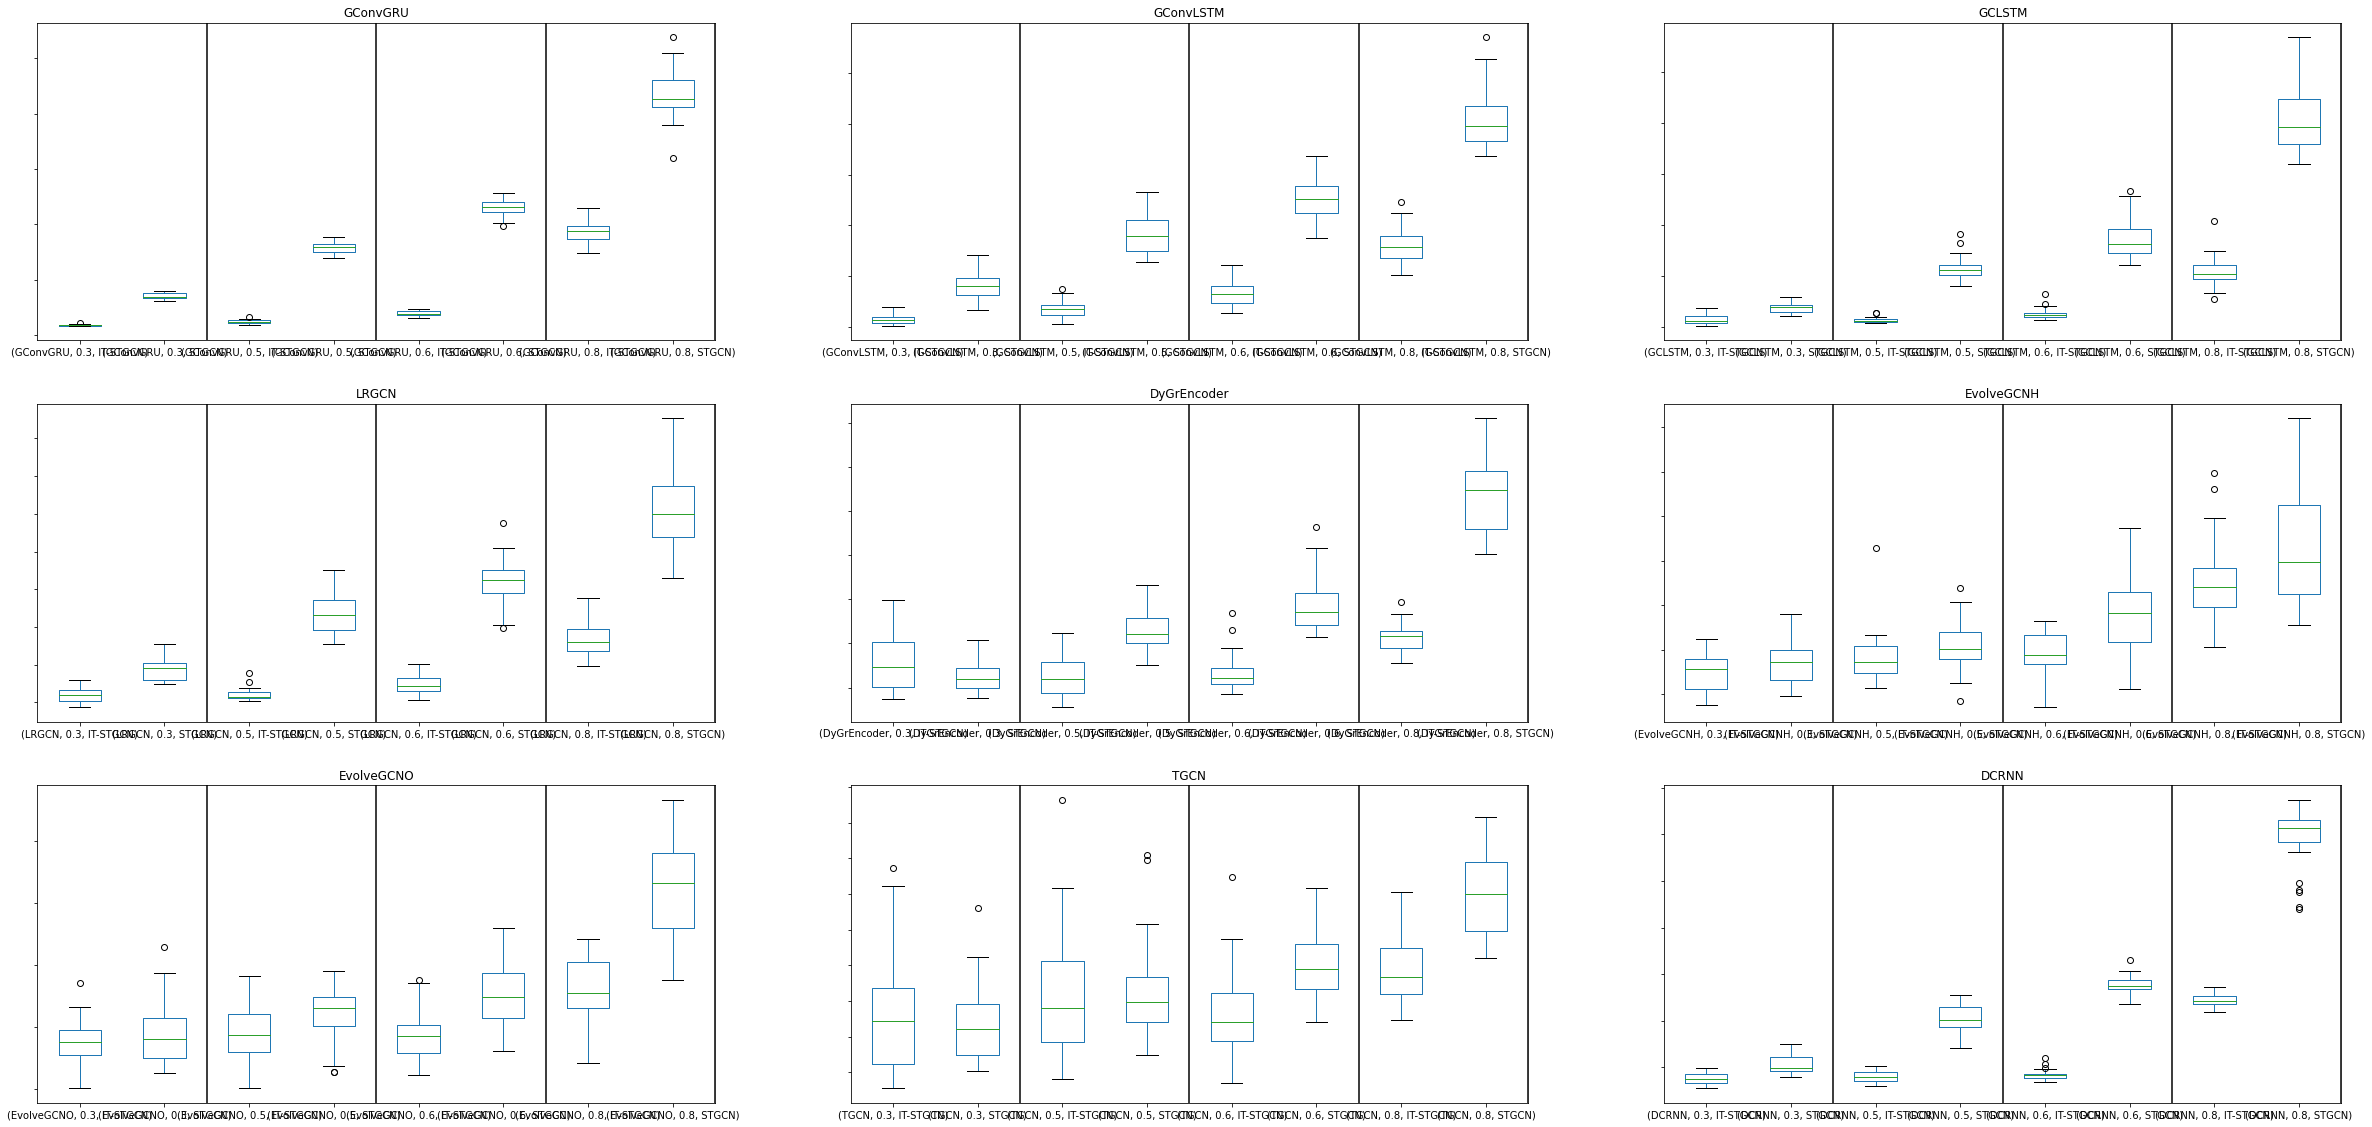

In [80]:
fig, ax = plt.subplots(3, 3,figsize=(40,20))

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==8 and epoch==50 and model=='GConvGRU'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,0],grid=False,widths=0.5)
ax[0,0].set_title('GConvGRU')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==64 and lags==8 and epoch==50 and model=='GConvLSTM'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,1],grid=False,widths=0.5)
ax[0,1].set_title('GConvLSTM')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==64 and lags==8 and epoch==50 and model=='GCLSTM'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,2],grid=False,widths=0.5)
ax[0,2].set_title('GCLSTM')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==32 and lags==8 and epoch==50 and model=='LRGCN'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,0],grid=False,widths=0.5)
ax[1,0].set_title('LRGCN')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==8 and epoch==50 and model=='DyGrEncoder'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,1],grid=False,widths=0.5)
ax[1,1].set_title('DyGrEncoder')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and lags==8 and epoch==50 and model=='EvolveGCNH'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,2],grid=False,widths=0.5)
ax[1,2].set_title('EvolveGCNH')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and lags==8 and epoch==50 and model=='EvolveGCNO'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,0],grid=False,widths=0.5)
ax[2,0].set_title('EvolveGCNO')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==8 and epoch==50 and model=='TGCN'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,1],grid=False,widths=0.5)
ax[2,1].set_title('TGCN')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==8 and epoch==50 and model=='DCRNN'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,2],grid=False,widths=0.5)
ax[2,2].set_title('DCRNN')


for ax in ax.flat:
    ax.set_yticklabels([])
    ax.axvline(x=2.5, color='black', linestyle='-')
    ax.axvline(x=4.5, color='black', linestyle='-')
    ax.axvline(x=6.5, color='black', linestyle='-')
    ax.axvline(x=8.5, color='black', linestyle='-')
    # ax.set_xticklabels(['IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
fig.suptitle('',fontsize=40)

In [81]:
pd.merge(df.query("dataset=='wikimath' and mtype=='rand'").groupby(['model','mrate','lags','nof_filters','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='wikimath' and mtype=='rand'").groupby(['model','mrate','lags','nof_filters','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','nof_filters','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate == 0.3")

,model,mrate,lags,nof_filters,inter_method,method,mean,std
0,DCRNN,0.3,8,12.0,linear,IT-STGCN,0.588,0.007
1,DCRNN,0.3,8,12.0,linear,STGCN,0.603,0.010
8,DyGrEncoder,0.3,8,12.0,linear,IT-STGCN,0.578,0.031
9,DyGrEncoder,0.3,8,12.0,linear,STGCN,0.562,0.016
16,EvolveGCNH,0.3,8,12.0,linear,IT-STGCN,0.775,0.021
17,EvolveGCNH,0.3,8,12.0,linear,STGCN,0.787,0.024
24,EvolveGCNO,0.3,8,12.0,linear,IT-STGCN,0.738,0.018
25,EvolveGCNO,0.3,8,12.0,linear,STGCN,0.743,0.024
32,GCLSTM,0.3,8,64.0,linear,IT-STGCN,0.628,0.020
33,GCLSTM,0.3,8,64.0,linear,STGCN,0.674,0.020


In [82]:
pd.merge(df.query("dataset=='wikimath' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='wikimath' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate != 0.3")

,model,mrate,lags,inter_method,method,mean,std
2,DCRNN,0.5,8,linear,IT-STGCN,0.590,0.006
3,DCRNN,0.5,8,linear,STGCN,0.652,0.015
4,DCRNN,0.6,8,linear,IT-STGCN,0.592,0.005
5,DCRNN,0.6,8,linear,STGCN,0.688,0.011
6,DCRNN,0.8,8,linear,IT-STGCN,0.672,0.007
7,DCRNN,0.8,8,linear,STGCN,0.846,0.031
10,DyGrEncoder,0.5,8,linear,IT-STGCN,0.565,0.024
11,DyGrEncoder,0.5,8,linear,STGCN,0.614,0.024
12,DyGrEncoder,0.6,8,linear,IT-STGCN,0.566,0.021
13,DyGrEncoder,0.6,8,linear,STGCN,0.644,0.032


## Block

In [83]:
pd.merge(df.query("dataset=='wikimath' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='wikimath' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,mrate,lags,inter_method,method,mean,std
0,DCRNN,0.120,8,linear,IT-STGCN,0.583,0.006
1,DCRNN,0.120,8,linear,STGCN,0.578,0.005
2,DyGrEncoder,0.120,8,linear,IT-STGCN,0.563,0.025
3,DyGrEncoder,0.120,8,linear,STGCN,0.546,0.016
4,EvolveGCNH,0.120,8,linear,IT-STGCN,0.776,0.028
5,EvolveGCNH,0.120,8,linear,STGCN,0.773,0.021
6,EvolveGCNO,0.120,8,linear,IT-STGCN,0.732,0.025
7,EvolveGCNO,0.120,8,linear,STGCN,0.735,0.022
8,GCLSTM,0.120,8,linear,IT-STGCN,0.640,0.019
9,GCLSTM,0.120,8,linear,STGCN,0.638,0.013


## missing values on the same nodes

In [84]:
pd.merge(df2.query("dataset=='wikimath'").groupby(['model','mrate','lags','method'])['mse'].mean().reset_index(),
        df2.query("dataset=='wikimath'").groupby(['model','mrate','lags','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,mrate,lags,method,mean,std
0,DCRNN,0.512,8,IT-STGCN,0.592,0.005
1,DCRNN,0.512,8,STGCN,0.665,0.015
2,DyGrEncoder,0.512,8,IT-STGCN,0.561,0.031
3,DyGrEncoder,0.512,8,STGCN,0.626,0.027
4,EvolveGCNH,0.512,8,IT-STGCN,0.794,0.031
5,EvolveGCNH,0.512,8,STGCN,0.818,0.031
6,EvolveGCNO,0.512,8,IT-STGCN,0.745,0.017
7,EvolveGCNO,0.512,8,STGCN,0.753,0.026
8,GCLSTM,0.512,8,IT-STGCN,0.617,0.011
9,GCLSTM,0.512,8,STGCN,0.823,0.048


# Windmillsmall(lags=8)

In [85]:
df.query("model=='GNAR' and dataset=='windmillsmall'")

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
26220,windmillsmall,GNAR,0.081291,block,8,NaN,linear,NaN,1.64923,3.428970,GNAR
26221,windmillsmall,GNAR,0.081291,block,8,NaN,linear,NaN,1.64923,3.492012,GNAR
26222,windmillsmall,GNAR,0.081291,block,8,NaN,linear,NaN,1.64923,2.916400,GNAR
26223,windmillsmall,GNAR,0.000000,NaN,8,NaN,NaN,NaN,1.64923,2.513212,GNAR
26224,windmillsmall,GNAR,0.700000,rand,8,NaN,nearest,NaN,1.64923,3.334994,GNAR
26225,windmillsmall,GNAR,0.000000,NaN,8,NaN,NaN,NaN,1.64923,2.116200,GNAR
26226,windmillsmall,GNAR,0.700000,rand,8,NaN,nearest,NaN,1.64923,2.391699,GNAR
26227,windmillsmall,GNAR,0.000000,NaN,8,NaN,NaN,NaN,1.64923,3.406726,GNAR
26228,windmillsmall,GNAR,0.700000,rand,8,NaN,nearest,NaN,1.64923,2.586957,GNAR


## Baseline

In [86]:
pd.merge(df.query("dataset=='windmillsmall' and mrate==0").groupby(['model','lags'])['mse'].mean().reset_index(),
         df.query("dataset=='windmillsmall' and mrate==0").groupby(['model','lags'])['mse'].std().reset_index(),
         on=['model','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,lags,mean,std
0,DCRNN,8,0.988,0.003
1,EvolveGCNO,8,0.983,0.001
2,GCLSTM,8,0.992,0.010
3,GConvGRU,8,1.003,0.004
4,GConvLSTM,8,1.019,0.045
5,GNAR,8,1.649,0.000
6,LRGCN,8,0.987,0.006
7,TGCN,8,0.991,0.010


## Random

<Axes: title={'center': 'mse'}, xlabel='[model, mrate, method]'>

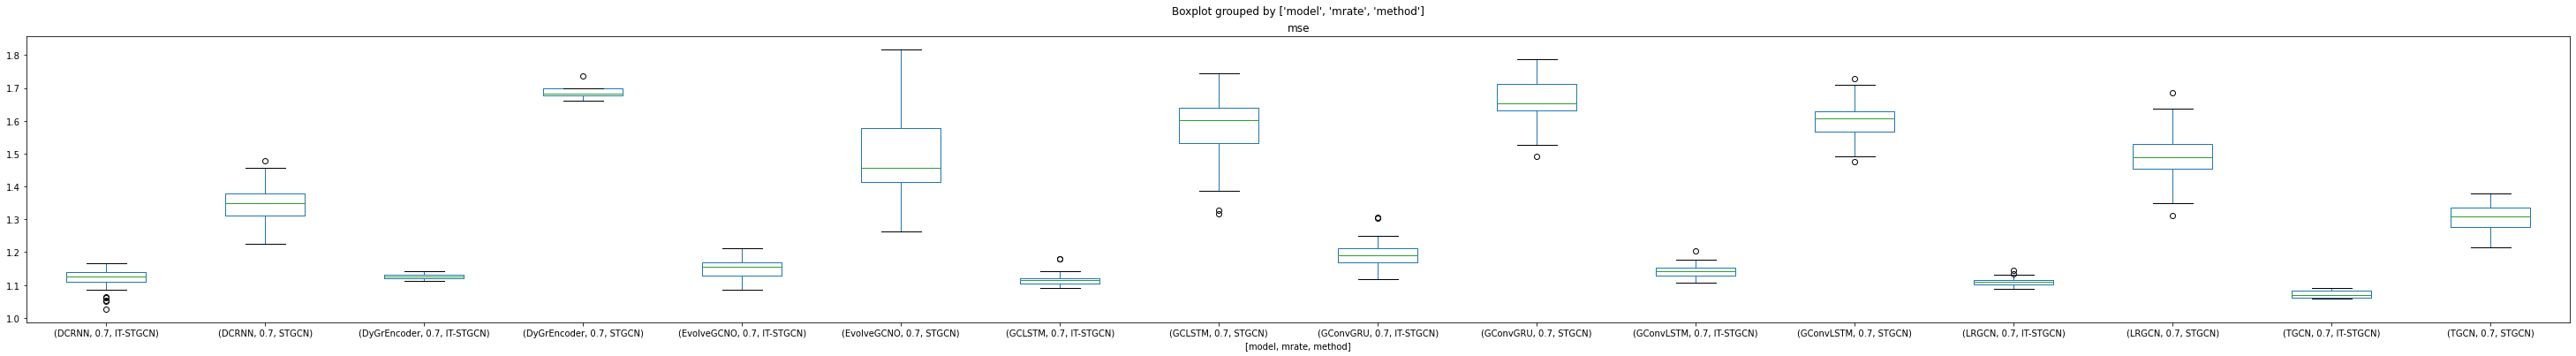

In [87]:
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1, figsize=(50, 6), sharey=True)
df.query("dataset=='windmillsmall' and mtype=='rand' and inter_method == 'linear' and lags==8 and epoch==50").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax1,grid=False,widths=0.5)

In [88]:
pd.merge(df.query("dataset=='windmillsmall' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='windmillsmall' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,mrate,lags,inter_method,method,mean,std
0,DCRNN,0.7,8,linear,IT-STGCN,1.117,0.034
1,DCRNN,0.7,8,linear,STGCN,1.348,0.057
2,DyGrEncoder,0.7,8,linear,IT-STGCN,1.126,0.011
3,DyGrEncoder,0.7,8,linear,STGCN,1.692,0.028
4,EvolveGCNO,0.7,8,linear,IT-STGCN,1.149,0.026
5,EvolveGCNO,0.7,8,linear,STGCN,1.495,0.137
6,GCLSTM,0.7,8,linear,IT-STGCN,1.116,0.021
7,GCLSTM,0.7,8,linear,STGCN,1.573,0.105
8,GConvGRU,0.7,8,linear,IT-STGCN,1.194,0.042
9,GConvGRU,0.7,8,linear,STGCN,1.662,0.073


## Block

In [89]:
pd.merge(df.query("dataset=='windmillsmall' and mtype=='block'").groupby(['model','mrate','nof_filters','lags','method'])['mse'].mean().reset_index(),
         df.query("dataset=='windmillsmall' and mtype=='block'").groupby(['model','mrate','nof_filters','lags','method'])['mse'].std().reset_index(),
         on=['model','method','nof_filters','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,mrate,nof_filters,lags,method,mean,std
0,DCRNN,0.081,4.0,8,IT-STGCN,0.983,0.002
1,DCRNN,0.081,4.0,8,STGCN,0.994,0.005
2,EvolveGCNO,0.081,12.0,8,IT-STGCN,0.983,0.002
3,EvolveGCNO,0.081,12.0,8,STGCN,0.990,0.002
4,GCLSTM,0.081,16.0,8,IT-STGCN,0.985,0.003
5,GCLSTM,0.081,16.0,8,STGCN,0.985,0.002
6,GConvGRU,0.081,12.0,8,IT-STGCN,1.007,0.005
7,GConvGRU,0.081,12.0,8,STGCN,1.008,0.006
8,GConvLSTM,0.081,16.0,8,IT-STGCN,0.997,0.022
9,GConvLSTM,0.081,16.0,8,STGCN,0.989,0.009


# Montevideobus (lags=4)

In [90]:
df.query("model=='GNAR' and dataset=='monte'")

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
26190,monte,GNAR,0.000000,NaN,4,NaN,NaN,NaN,1.061937,6.576898,GNAR
26191,monte,GNAR,0.800000,rand,4,NaN,nearest,NaN,1.061937,4.220497,GNAR
26192,monte,GNAR,0.000000,NaN,4,NaN,NaN,NaN,1.061937,4.429234,GNAR
26193,monte,GNAR,0.800000,rand,4,NaN,nearest,NaN,1.061937,4.886660,GNAR
26194,monte,GNAR,0.000000,NaN,4,NaN,NaN,NaN,1.061937,4.879432,GNAR
26195,monte,GNAR,0.800000,rand,4,NaN,nearest,NaN,1.061937,4.814065,GNAR
26217,monte,GNAR,0.149142,block,4,NaN,nearest,NaN,1.061937,4.948565,GNAR
26218,monte,GNAR,0.149142,block,4,NaN,nearest,NaN,1.061937,2.942073,GNAR
26219,monte,GNAR,0.149142,block,4,NaN,nearest,NaN,1.061937,5.179985,GNAR


## Baseline

In [91]:
pd.merge(df.query("dataset=='monte' and mrate==0").groupby(['model','lags'])['mse'].mean().reset_index(),
         df.query("dataset=='monte' and mrate==0").groupby(['model','lags'])['mse'].std().reset_index(),
         on=['model','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,lags,mean,std
0,DCRNN,4,0.936,0.002
1,DyGrEncoder,4,0.995,0.034
2,EvolveGCNH,4,1.182,0.192
3,EvolveGCNO,4,1.157,0.182
4,GCLSTM,4,0.970,0.011
5,GConvGRU,4,0.931,0.002
6,GConvLSTM,4,0.960,0.011
7,GNAR,4,1.062,0.000
8,LRGCN,4,0.980,0.024
9,TGCN,4,0.983,0.006


## Random

<Axes: title={'center': 'mse'}, xlabel='[model, mrate, method]'>

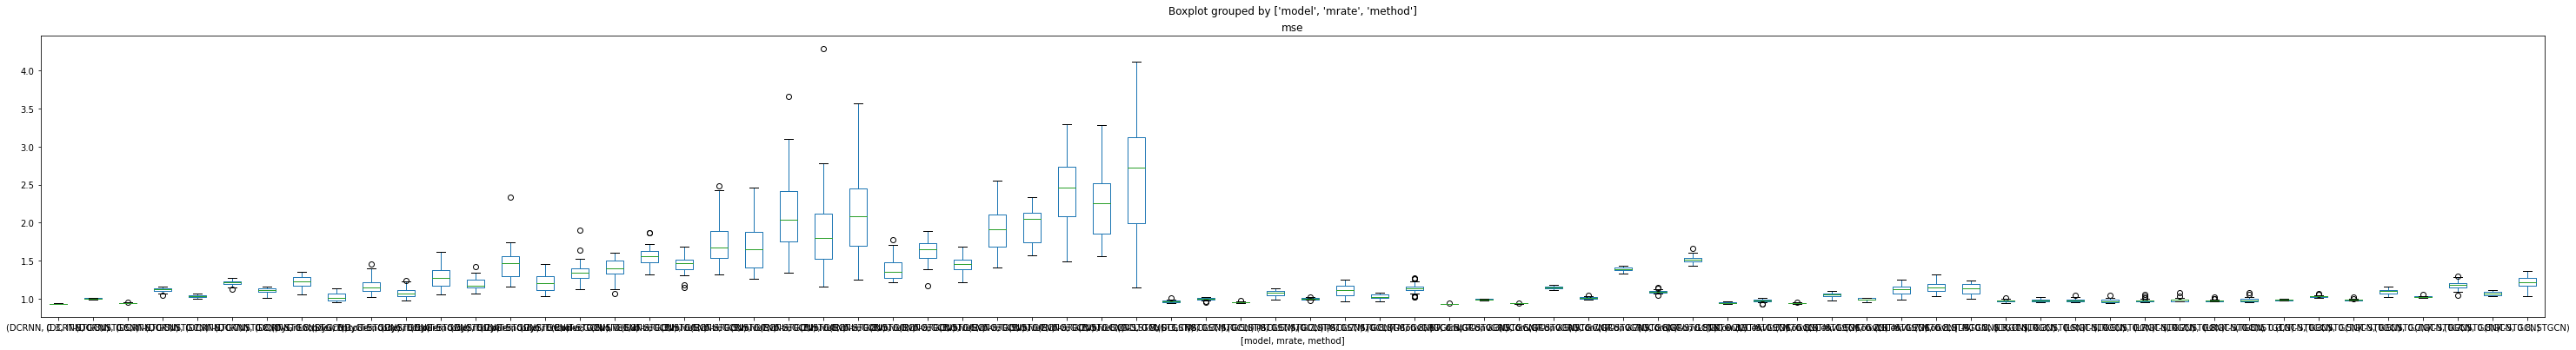

In [92]:
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1, figsize=(50, 6), sharey=True)
df.query("dataset=='monte' and mtype=='rand' and inter_method == 'nearest' and lags==4 and epoch==50").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax1,grid=False,widths=0.5)

In [93]:
pd.merge(df.query("dataset=='monte' and mtype=='rand'").groupby(['model','mrate','nof_filters','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='monte' and mtype=='rand'").groupby(['model','mrate','nof_filters','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','mrate','nof_filters','inter_method','method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,mrate,nof_filters,lags,inter_method,method,mean,std
0,DCRNN,0.3,12.0,4,nearest,IT-STGCN,0.938,0.001
1,DCRNN,0.3,12.0,4,nearest,STGCN,1.008,0.006
2,DCRNN,0.5,12.0,4,nearest,IT-STGCN,0.948,0.002
3,DCRNN,0.5,12.0,4,nearest,STGCN,1.119,0.025
4,DCRNN,0.7,12.0,4,nearest,IT-STGCN,1.031,0.018
...,...,...,...,...,...,...,...,...
67,TGCN,0.5,8.0,4,nearest,STGCN,1.100,0.036
68,TGCN,0.7,8.0,4,nearest,IT-STGCN,1.030,0.010
69,TGCN,0.7,8.0,4,nearest,STGCN,1.183,0.057
70,TGCN,0.8,8.0,4,nearest,IT-STGCN,1.073,0.024


## Block

In [94]:
pd.merge(df.query("dataset=='monte' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='monte' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,model,mrate,lags,inter_method,method,mean,std
0,DCRNN,0.149,4,nearest,IT-STGCN,0.940,0.001
1,DCRNN,0.149,4,nearest,STGCN,0.956,0.003
2,DyGrEncoder,0.149,4,nearest,IT-STGCN,1.005,0.046
3,DyGrEncoder,0.149,4,nearest,STGCN,1.030,0.044
4,EvolveGCNH,0.149,4,nearest,IT-STGCN,1.392,0.110
5,EvolveGCNH,0.149,4,nearest,STGCN,1.612,0.216
6,EvolveGCNO,0.149,4,nearest,IT-STGCN,1.345,0.110
7,EvolveGCNO,0.149,4,nearest,STGCN,1.766,0.123
8,GCLSTM,0.149,4,nearest,IT-STGCN,0.959,0.008
9,GCLSTM,0.149,4,nearest,STGCN,0.956,0.005


In [95]:
pd.merge(df.query("dataset=='monte' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='monte' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("inter_method=='nearest'")

,model,mrate,lags,inter_method,method,mean,std
0,DCRNN,0.149,4,nearest,IT-STGCN,0.940,0.001
1,DCRNN,0.149,4,nearest,STGCN,0.956,0.003
2,DyGrEncoder,0.149,4,nearest,IT-STGCN,1.005,0.046
3,DyGrEncoder,0.149,4,nearest,STGCN,1.030,0.044
4,EvolveGCNH,0.149,4,nearest,IT-STGCN,1.392,0.110
5,EvolveGCNH,0.149,4,nearest,STGCN,1.612,0.216
6,EvolveGCNO,0.149,4,nearest,IT-STGCN,1.345,0.110
7,EvolveGCNO,0.149,4,nearest,STGCN,1.766,0.123
8,GCLSTM,0.149,4,nearest,IT-STGCN,0.959,0.008
9,GCLSTM,0.149,4,nearest,STGCN,0.956,0.005
